In [28]:
from astropy.io import ascii 
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.cosmology import WMAP9 as cosmo
from astropy.modeling import models, fitting
import os
import pickle
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [2]:
#total catalog from COSMOS(2016)
total = Table.read('./datas/cosmos2015_2.fits')

#mass complete sample
total_z = total[(total['zphot'] > 0) & (total['zphot'] < 9) & (total['OType'] == 0) & (total['Mass'] > 9.545)]


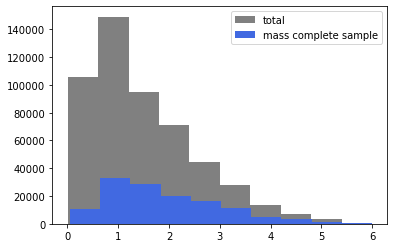

In [3]:
total2 = total[(total['zphot'] > 0) & (total['zphot'] < 9)]
plt.hist(total2['zphot'], label = 'total', color = 'grey')
plt.hist(total_z['zphot'], label = 'mass complete sample', color = 'royalblue')
plt.legend()
# plt.savefig('fig1.png')

In [4]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# define functions & variables

In [5]:
#find grid step: 100kpc
def find_grid_step(z):
    sep = cosmo.arcsec_per_kpc_proper(z) * 100 * u.kpc
    return sep.to(u.deg).value

#find bin size
def find_bin_size(z):
    del_z = 0.015 * (1+z)
    return del_z

#find search radius: 700kpc
def find_search_radius(z):
    r = cosmo.arcsec_per_kpc_proper(z) * 700 * u.kpc # arcsec
    
    return r.to(u.deg).value

#find redshift increment next to z
def find_bin_step(z):
    closest = 0
    compare_v = 100
    
    for i in np.arange(z+0.03, z, -0.00001):
        v = cosmo.H0 * (cosmo.comoving_distance(i) - cosmo.comoving_distance(z)) 
#         
        if np.abs(v.value - 1500) < compare_v:
            closest = i
            compare_v = np.abs(v.value - 1500)
#             print(compare_v, end = ' ')
    #return next z
    return closest



In [6]:
# redshifts = [0.6]

# while redshifts[-1] < 1.2:
#     rs = find_bin_step(redshifts[-1])
#     redshifts.append(rs)
    
# redshifts = np.array(redshifts)

In [11]:
redshifts = np.arange(0.6, 1.22, 0.01)
len(redshifts)

62

In [13]:
# np.save('bins/bins_cosmos/search_700kpc/redshifts/redshifts', redshifts)
np.save('bins/bins_cosmos/step/redshifts/redshifts', redshifts)

In [14]:
binsize = find_bin_size(redshifts)
np.save('bins/bins_cosmos/step/redshifts/binsize', binsize)

In [26]:
len(redshifts), len(binsize)

(74, 74)

In [27]:
range(len(redshifts))

range(0, 74)

# create density fields

In [7]:
redshifts = np.load('bins/bins_cosmos/search_700kpc/redshifts/redshifts.npy')

In [8]:
binsize = np.load('bins/bins_cosmos/search_700kpc/redshifts/binsize.npy')

In [15]:
# consctruct density field
def construction(idx):
    bs = binsize[idx] #binsize
    z = redshifts[idx]
    zrange = total_z[(total_z['zphot'] <=  z + bs) & (total_z['zphot'] >= z - bs)]
    
    print(f'{z : .4f}', end = ' ')
    
    #grid separation = 0.1Mpc
    gstep = find_grid_step(z)
    grid_ra = np.arange(min(zrange['RAJ2000']), max(zrange['RAJ2000']), gstep)
    grid_dec = np.arange(min(zrange['DEJ2000']), max(zrange['DEJ2000']), gstep)
    
    grid = np.zeros((len(grid_dec), len(grid_ra)))
    
    print(len(grid_dec))
    for j in range(len(grid_ra)):
#         if(i % 100 == 0):
#             print(i)
        for i in range(len(grid_dec)):
            #within 1Mpc, z -> z_cl +- error
            sr = find_search_radius(z)
            
            sample = zrange[((zrange['RAJ2000'] -  grid_ra[j])**2 + (zrange['DEJ2000'] - grid_dec[i])**2 < sr**2)]
            grid[i, j] = len(sample)
    
    print(grid.shape)
    np.save(f'./bins/bins_cosmos/step/bins_{idx:03d}', grid)        
    
    print(f'{z} completed')

In [16]:
import multiprocessing as mp

In [17]:
n = 10 #number of cores to use
with mp.Pool(n) as p:
    print(p.map(construction, range(158)))

 0.8400 0.9200 0.8800 0.6400     0.9600 297330

338334

 0.6800 0.7200 0.7600 0.8000 0.6000 342    
289
318
312305

324
(289, 329)
0.6 completed
 0.6100 291
(297, 339)
0.64 completed
 0.6500 299
(305, 349)
0.68 completed
 0.6900 307
(312, 358)
0.7200000000000001 completed
 0.7300 313
(318, 363)
0.7600000000000001 completed
 0.7700 320
(324, 371)
0.8000000000000002 completed
 0.8100 326
(330, 378)
0.8400000000000002 completed
 0.8500 331
(334, 381)
0.8800000000000002 completed
 0.8900 335
(338, 386)
0.9200000000000003 completed
 0.9300 339
(342, 392)
0.9600000000000003 completed
 0.9700 343
(291, 332)
0.61 completed
 0.6200 293
(299, 341)
0.65 completed
 0.6600 301
(307, 351)
0.6900000000000001 completed
 0.7000 309
(313, 359)
0.7300000000000001 completed
 0.7400 315
(320, 365)
0.7700000000000001 completed
 0.7800 321
(326, 373)
0.8100000000000002 completed
 0.8200 327
(331, 379)
0.8500000000000002 completed
 0.8600 332
(335, 382)
0.8900000000000002 completed
 0.9000 336
(339, 387)
0.93

IndexError: index 64 is out of bounds for axis 0 with size 62

In [ ]:
# create the masks around bright objects

In [18]:
# xgroup_z
# file_list = os.listdir(f'./bins/bins_cosmos/search_700kpc')
file_list = os.listdir(f'./bins/bins_cosmos/step/')

file_list.sort()

In [19]:
file_list[:6]

['bins_000.npy',
 'bins_001.npy',
 'bins_002.npy',
 'bins_003.npy',
 'bins_004.npy',
 'bins_005.npy']

In [20]:
def densityfield(i, n = 10):
    print(i, end = ' ')
    grid = np.load('./bins/bins_cosmos/step/' + file_list[i])


    bs = binsize[i] #binsize
    z = redshifts[i]
    zrange = total_z[(total_z['zphot'] <=  z + bs) & (total_z['zphot'] >= z - bs)]

    print(f'{z : .4f}', end = ' ')

    #grid separation = 0.1Mpc
    gstep = find_grid_step(z)
    grid_ra = np.arange(min(zrange['RAJ2000']), max(zrange['RAJ2000']), gstep)
    grid_dec = np.arange(min(zrange['DEJ2000']), max(zrange['DEJ2000']), gstep)

    grid_x, grid_y = np.meshgrid(grid_ra, grid_dec)

    np.save(f'./bins/bins_cosmos/step/grid_x/gird_x_{i:03d}', grid_x)
    np.save(f'./bins/bins_cosmos/step/grid_y/gird_y_{i:03d}', grid_y)

    #find first voids
    void_mask = np.full(grid.shape, True, dtype = bool)
    ids_j = []
    ids_k = []
    for k in range(len(grid_ra)):   

        if k%100 == 0:
            print(k,  end= ' ')
        for j in range(len(grid_dec)):
            ra = grid_x[j, k]
            dec = grid_y[j, k]

            mask = (ra - total_z['RAJ2000'])**2 + (dec - total_z['DEJ2000'])**2 <= gstep**2

            samp = total_z[mask]

            if len(samp) == 0:
                #make it false!
                void_mask[j, k] = False
                ids_j.append(j)
                ids_k.append(k)

    ids_j = np.array(ids_j)
    ids_k = np.array(ids_k)
    ids_check = np.full(ids_j.shape, True, dtype = bool)

    #find second voids (nearby area)
    void_mask_extra = np.full(grid.shape, True, dtype = bool)
    ids_final = np.array([], dtype = int)

    for j in range(len(ids_j)):

        if not ids_check[j]:
            #already checked
            continue
        else:
            ids_check[j] = False

        mask = (ids_j[j] - ids_j)**2 + (ids_k[j] - ids_k)**2 <= 2

        final_ids = np.array([], dtype = int)
        final_ids = np.concatenate([final_ids, np.array([j])])

        if len(ids_j[mask & ids_check]) > 0:
            #iterate!
            final_ids = np.concatenate([final_ids, np.where(mask & ids_check)[0]])
            ids_check[final_ids] = False

            add_ids = np.array([], dtype = int)

            first = True
            while True:

                if first:
                    temp = np.where(mask & ids_check)[0]
                    first = False
                else:
                    temp = temp2.copy()

                temp2 = np.array([], dtype = int)

                for k in range(len(temp)):
                    mask = (ids_j[k] - ids_j)**2 + (ids_k[k] - ids_k)**2 <= 2

                    if len(ids_j[mask & ids_check]) > 0:
                        temp2 = np.concatenate([temp2, np.where(mask & ids_check)[0]])
                        ids_check[temp2] = False
                    else:
                        continue

                if len(temp2) > 0:
                    add_ids = np.concatenate([add_ids, temp2])
                    continue
                else:
                    final_ids = np.concatenate([final_ids, add_ids])
                    break

        if len(final_ids) > n:
            ids_final = np.concatenate([ids_final, final_ids])

    #flag nearby area 
    for j in range(len(ids_final)):   
        xs = []
        ys = []
        for l in range(-ratio, ratio+1):
            xs += list(range(ids_j[ids_final[j]] - (ratio - np.abs(l)), ids_j[ids_final[j]] + (ratio - np.abs(l)) + 1))
            ys += [ids_k[ids_final[j]] + l] * (2 *(ratio - np.abs(l)) + 1)

        xs = np.array(xs)
        ys = np.array(ys)

        ids = np.where((xs >= 0) & (ys >= 0) & (ys < grid.shape[1]) & (xs < grid.shape[0]))[0]

        void_mask_extra[xs[ids], ys[ids]] = False


    #total
    plt.scatter(grid_x, grid_y, alpha = 0.05, s = 1)
    plt.scatter(grid_x[(void_mask_extra & void_mask)], grid_y[(void_mask_extra & void_mask)], s = 1)
    # plt.scatter(ras, decs)

    np.save(f'./bins/bins_cosmos/step/mask1/mask1_{i:03d}', void_mask)
    np.save(f'./bins/bins_cosmos/step/mask2/mask2_{i:03d}', void_mask_extra)

    print('successfully saved!')

In [21]:
#multi processing
with mp.Pool(10) as p:
    print(p.map(densityfield, range(len(redshifts))))

0141816 62121048          0.6000  0.7400  0.7600 0.6400 0.7800 0.7200 0.6200 0.6600 0.7000      0  0.6800  0 0 000   000   0 100 100 100 100 100 100 100 100 100 100 200 200 200 200 200 200 200 200 200 200 300 300 300 300 300 300 300 successfully saved!
1  0.6100 0 300 300 300 successfully saved!
3  0.6300 0 successfully saved!
5  0.6500 0 successfully saved!
9  0.6900 0 successfully saved!
7  0.6700 0 successfully saved!
11  0.7100 0 successfully saved!
13  0.7300 0 successfully saved!
15  0.7500 0 successfully saved!
17  0.7700 0 successfully saved!
19  0.7900 0 100 100 100 100 100 100 100 100 100 100 200 200 200 200 200 200 200 200 200 300 200 300 300 successfully saved!
20  0.8000 0 300 300 successfully saved!
22  0.8200 0 300 successfully saved!
24  0.8400 0 300 300 successfully saved!
26  0.8600 0 300 successfully saved!
28  0.8800 0 300 successfully saved!
30  0.9000 0 successfully saved!
32  0.9200 0 100 successfully saved!
34  0.9400 0 100 successfully saved!
36  0.9600 0 100 s

# find overdense region

In [9]:
redshifts = np.load('bins/bins_cosmos/search_700kpc/redshifts/redshifts.npy')
binsize = np.load('bins/bins_cosmos/search_700kpc/redshifts/binsize.npy')

In [10]:
file_list = os.listdir(f'./bins/bins_cosmos/search_700kpc/')
file_list.sort()

mask1_list = os.listdir(f'./bins/bins_cosmos/search_700kpc/mask1_10/')
mask2_list = os.listdir(f'./bins/bins_cosmos/search_700kpc/mask2_10/')
mask1_list.sort()
mask2_list.sort()

xlist = os.listdir('./bins/bins_cosmos/search_700kpc/grid_x/')
ylist = os.listdir('./bins/bins_cosmos/search_700kpc/grid_y/')

xlist.sort()
ylist.sort()

In [23]:
# xlist

In [18]:
od = 7
od_ra = []
od_dec = []
od_z = []

for i in range(len(redshifts)):
# for i in range(1):
    od_z_ra = []
    od_z_dec = []
    od_z_z = []
    print(i, end = ' ')
    grid = np.load('./bins/bins_cosmos/search_700kpc/' + file_list[i])
    mask1 = np.load('./bins/bins_cosmos/search_700kpc/mask1_10/' + mask1_list[i])
    mask2 = np.load('./bins/bins_cosmos/search_700kpc/mask2_10/' + mask2_list[i])

#         plt.figure()

    #grid separation = 0.1Mpc
    bs = binsize[i] #binsize
    z = redshifts[i]

    gstep = find_grid_step(redshifts[i])
    print(gstep)
    grid_x = np.load('./bins/bins_cosmos/search_700kpc/grid_x/' + xlist[i])
    grid_y = np.load('./bins/bins_cosmos/search_700kpc/grid_y/' + ylist[i])


    grid_1d = grid[mask1 & mask2]
    mean = grid_1d.mean()

    std = grid_1d.std()

    overdense_mask = grid >= mean + od * std
    sparse_mask = grid < mean + od * std

    ras = grid_x[overdense_mask & mask1 & mask2]
    decs = grid_y[overdense_mask & mask1 & mask2]



    #save checked
    checked = np.full(ras.shape, True, dtype = bool)

    for k in range(len(ras)):
        #itself
        if not checked[k]:
            print('already checekd')
            continue
        else:
            print('find its first friends')

        ra = ras[k]
        dec = decs[k]
        checked[k] = False

#         temp_checked = []

        coord_mask = ((ras - ra)**2 + (decs - dec)**2 <=  gstep**2)  
        check_index = np.where(ras[coord_mask & checked])[0]

        #if it has no member
        if len(ras[coord_mask & checked]) == 0:
            print('no friends found')
            continue

        #friends
        friends_ra = ras[coord_mask & checked]
        friends_dec = decs[coord_mask & checked]
        checked[check_index] = False

        #update
        final_ra = np.concatenate([np.array([ra]), friends_ra])
        final_dec = np.concatenate([np.array([dec]), friends_dec])

        #find its friends of friends
        flag = True
        first = True

        new_ra = np.array([])
        new_dec = np.array([])
        while flag:

            if first:
                first = False
                cand_ra = friends_ra.copy()
                cand_dec = friends_dec.copy()
            else:
                cand_ra = temp_ra.copy()
                cand_dec = temp_dec.copy()


            temp_ra = np.array([])
            temp_dec = np.array([])

            for l in range(len(cand_ra)):
                ra2 = cand_ra[l]
                dec2 = cand_dec[l]
                sec_index = np.where((ras == ra2) & (decs == dec2))[0]

                if not checked[sec_index]:
                    continue
                else:
                    checked[sec_index] = False

                coord_mask2 = ((ras - ra2)**2 + (decs - dec2)**2 <= gstep**2)
                check_index2 = np.where(ras[coord_mask2 & checked])[0] 

                if len(ras[coord_mask2 & checked])  == 0:
                    continue


                #friends
                temp_ra = np.concatenate([temp_ra, ras[coord_mask2 & checked]])
                temp_dec = np.concatenate([temp_dec, decs[coord_mask2 & checked]])

                checked[check_index2] = False

            if len(temp_ra) > 0:
                print(f'+{len(temp_ra)}')
                new_ra = np.concatenate([new_ra, temp_ra])
                new_dec= np.concatenate([new_dec, temp_dec])
            else:
                flag = False


        final_ra = np.concatenate([final_ra, new_ra])
        final_dec = np.concatenate([final_dec, new_dec])

        if len(final_ra) >= 10:        
            od_z_ra.append(final_ra)
            od_z_dec.append(final_dec)
            od_z_z.append(i)
        else:
            print('less than 10 members')

    od_ra.append(od_z_ra)
    od_dec.append(od_z_dec)
    od_z.append(od_z_z)

0 0.004092216063266745
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
1 0.004070289875584101
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
2 0.004048849824252498
find its fi

10 0.003893444355093849
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first f

find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found


find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found


find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends


no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
30 0.003604372763989715
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found

find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found


find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
50 0.003416295096280257
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends foun

find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
58 0.0033619288485998104
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
59 0.003355847520044772
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no friends found
find its first friends
no frien

In [25]:
checekd

NameError: name 'checekd' is not defined

In [29]:
od = 7
od_ra = []
od_dec = []
od_z = []

for i in range(len(redshifts)):
# for i in range(1):
    od_z_ra = []
    od_z_dec = []
    od_z_z = []
    print(i, end = ' ')
    grid = np.load('./bins/bins_cosmos/search_700kpc/' + file_list[i])
    mask1 = np.load('./bins/bins_cosmos/search_700kpc/mask1_10/' + mask1_list[i])
    mask2 = np.load('./bins/bins_cosmos/search_700kpc/mask2_10/' + mask2_list[i])

#         plt.figure()

    #grid separation = 0.1Mpc
    bs = binsize[i] #binsize
    z = redshifts[i]

    gstep = find_grid_step(redshifts[i])
    print(gstep)
    grid_x = np.load('./bins/bins_cosmos/search_700kpc/grid_x/' + xlist[i])
    grid_y = np.load('./bins/bins_cosmos/search_700kpc/grid_y/' + ylist[i])


    grid_1d = grid[mask1 & mask2]
    mean = grid_1d.mean()

    std = grid_1d.std()

    overdense_mask = grid >= mean + od * std
    sparse_mask = grid < mean + od * std

    ras = grid_x[overdense_mask & mask1 & mask2]
    decs = grid_y[overdense_mask & mask1 & mask2]



    #save checked
    checked = np.full(ras.shape, True, dtype = bool)

    for k in range(len(ras)):
        #itself
        if not checked[k]:
            print('already checekd')
            continue
        else:
            print('find its first friends')

        ra = ras[k]
        dec = decs[k]
        checked[k] = False

#         temp_checked = []

        coord_mask = ((ras - ra)**2 + (decs - dec)**2 <=  gstep**2)  
        check_index = np.where(ras[coord_mask & checked])[0]
        print(check_index)
        #if it has no member
        if len(ras[coord_mask & checked]) == 0:
            print('no friends found')
            continue

        #friends
        friends_ra = ras[coord_mask & checked]
        friends_dec = decs[coord_mask & checked]
        checked[check_index] = False

        #update
        final_ra = np.concatenate([np.array([ra]), friends_ra])
        final_dec = np.concatenate([np.array([dec]), friends_dec])

        #find its friends of friends
        flag = True
        first = True

        new_ra = np.array([])
        new_dec = np.array([])
        while flag:

            if first:
                first = False
                cand_ra = friends_ra.copy()
                cand_dec = friends_dec.copy()
            else:
                cand_ra = temp_ra.copy()
                cand_dec = temp_dec.copy()


            temp_ra = np.array([])
            temp_dec = np.array([])

            for l in range(len(cand_ra)):
                ra2 = cand_ra[l]
                dec2 = cand_dec[l]
                sec_index = np.where((ras == ra2) & (decs == dec2))[0]

                if not checked[sec_index]:
                    continue
                else:
                    checked[sec_index] = False

                coord_mask2 = ((ras - ra2)**2 + (decs - dec2)**2 <= gstep**2)
                check_index2 = np.where(ras[coord_mask2 & checked])[0] 

                if len(ras[coord_mask2 & checked])  == 0:
                    continue


                #friends
                temp_ra = np.concatenate([temp_ra, ras[coord_mask2 & checked]])
                temp_dec = np.concatenate([temp_dec, decs[coord_mask2 & checked]])

                checked[check_index2] = False

            if len(temp_ra) > 0:
                print(f'+{len(temp_ra)}')
                new_ra = np.concatenate([new_ra, temp_ra])
                new_dec= np.concatenate([new_dec, temp_dec])
            else:
                flag = False


        final_ra = np.concatenate([final_ra, new_ra])
        final_dec = np.concatenate([final_dec, new_dec])

        if len(final_ra) >= 10:        
            od_z_ra.append(final_ra)
            od_z_dec.append(final_dec)
            od_z_z.append(i)
        else:
            print('less than 10 members')

    od_ra.append(od_z_ra)
    od_dec.append(od_z_dec)
    od_z.append(od_z_z)

0 0.004154934283527704
find its first friends
[0 1]
+1
+1
less than 10 members
already checekd
already checekd
already checekd
find its first friends
[0 1]
less than 10 members
already checekd
already checekd
already checekd
1 0.0041328882370597715
find its first friends
[0]
+2
+3
+3
+2
+1
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
+1
less than 10 members
already checekd
already checekd
find its first friends
[]
no friends found
2 0.004111333250401251
find its first friends
[0 1]
+2
+3
+4
+4
+4
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[0]
less than 10 members
already checekd
3 0

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
+2
+3
+3
already checekd
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[0]
+1
+1
+1
+1
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0 1]
+3
+4
+3
+3
+4
+4
+2
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
+1
less than 10 members
already checekd
already checekd
find its first frien

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
less than 10 members
find its first friends
[]
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find

already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
alread

+3
+3
+3
+3
+3
+3
+3
+3
+3
+2
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0 1]
+3
+3
+3
+3
+3
+3
+3
+3
+3
+3
+3
+3
+3
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
22 0.003766524042347305
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[0 1]
+5
+7
+5
+5
+4
+3
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
+1
+1
+1
+1
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[0]
+1
+1
less than 10 members
already checekd
already checekd
already checekd
23 0.003752885169337294
find i

no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[0]
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[]
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
al

already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 m

[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[]
no friends found
already checekd
find its first friends
[]
no friends found
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[]
no friends found
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[]
no frien

already checekd
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
already checekd
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
alrea

less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
37 0.0035898424219700242
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
already checekd
already checekd
already checekd
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[]
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[]
no friends

no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends 

find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
less than 10 members
already checekd
already checekd
find its first friends
[0]
less than 10 members
already checekd
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[]
no friends found
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
+1
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[0]
less than 10 members
find its first friends
[]
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
[]
no friends found
find its first friends
[]
no friends found
58 0.003423298433623433
find its first friends
[]
no friends found
find its first friends
[0]
+1
+1
less than 10 members
already checekd
find its first friends
[0]
+1
less than 10 members
find its first fr

In [27]:
checked

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# check density field efficiency

## distribution

In [9]:
file_list = os.listdir(f'./bins/density_field/bins_new_all')
file_list.sort()

mask1_list = os.listdir(f'./bins/density_field/bins_new_all/mask1_10/')
mask2_list = os.listdir(f'./bins/density_field/bins_new_all/mask2_10/')
mask1_list.sort()
mask2_list.sort()

/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


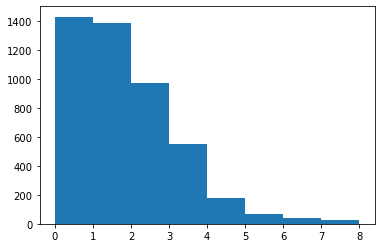

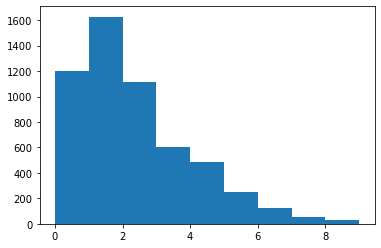

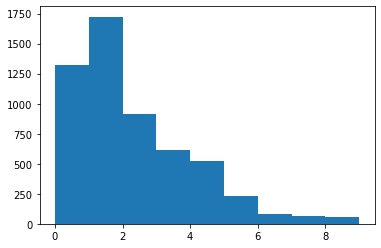

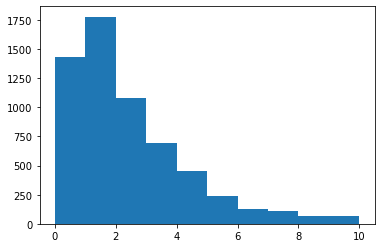

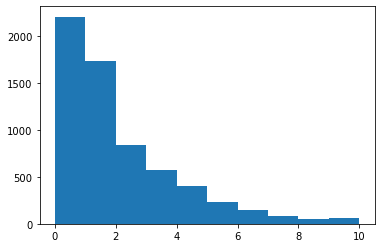

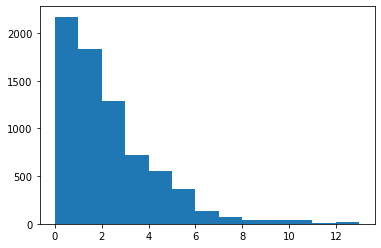

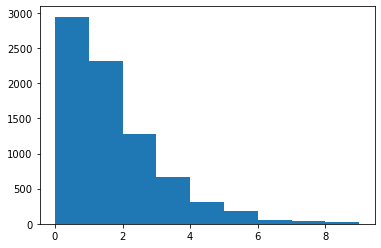

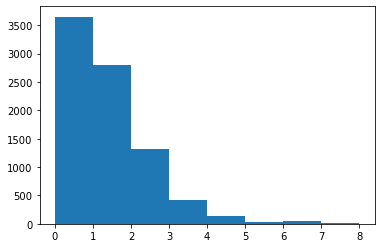

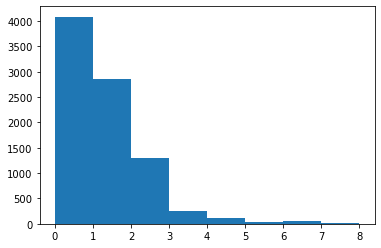

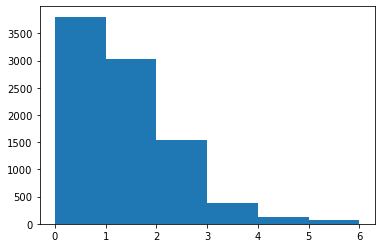

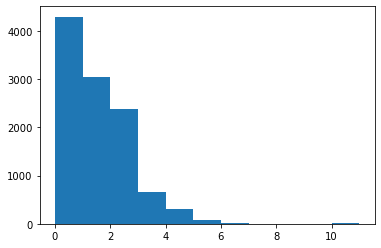

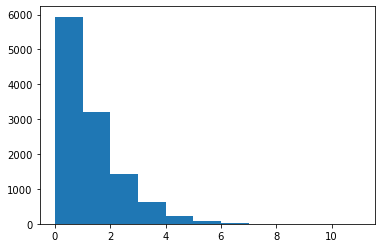

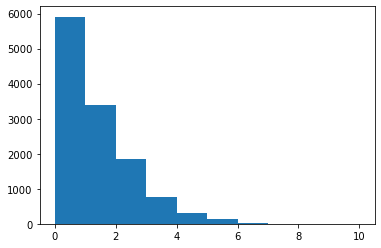

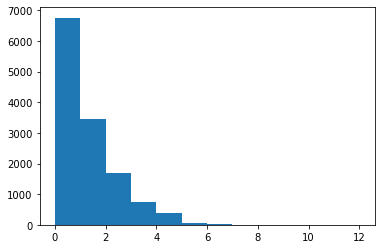

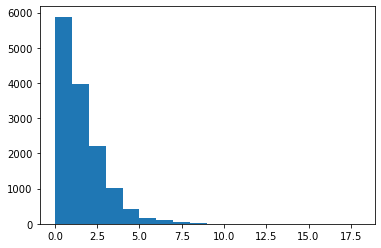

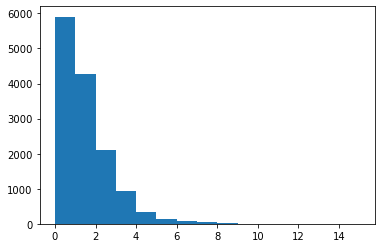

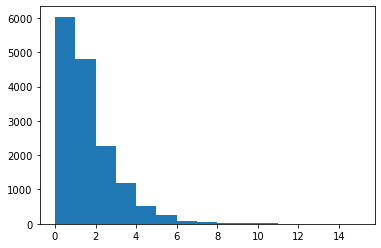

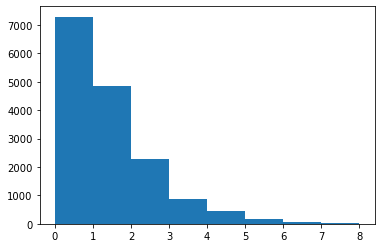

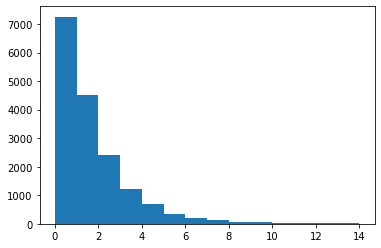

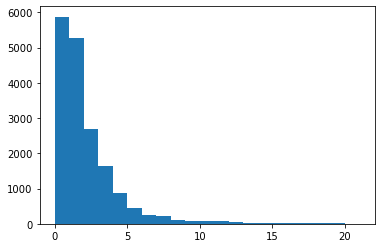

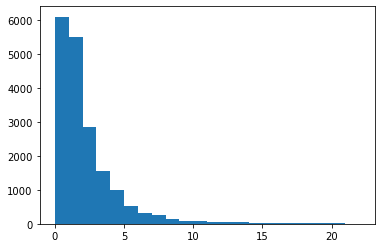

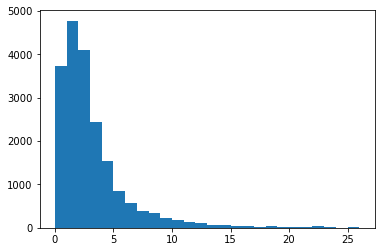

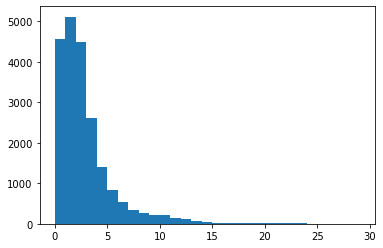

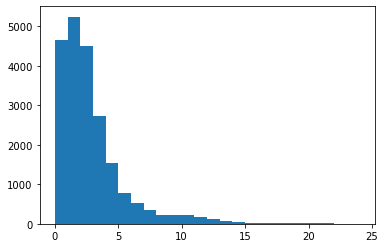

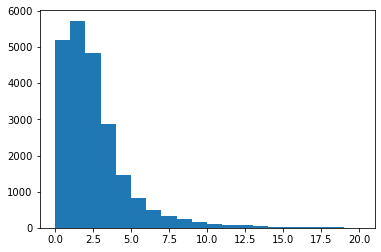

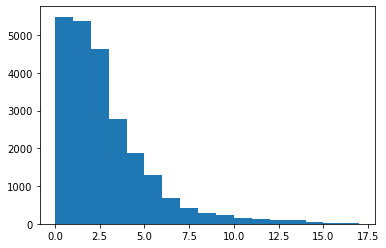

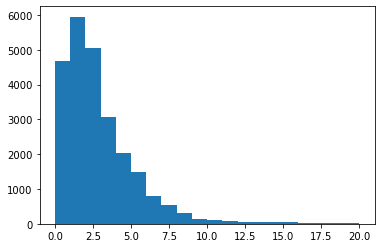

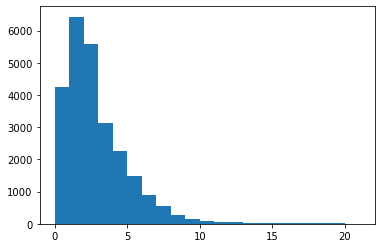

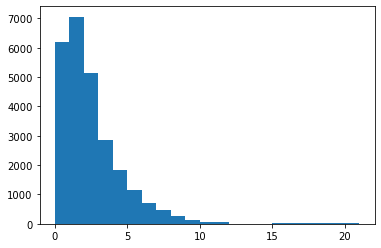

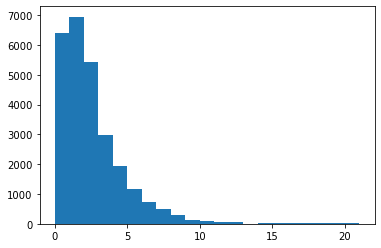

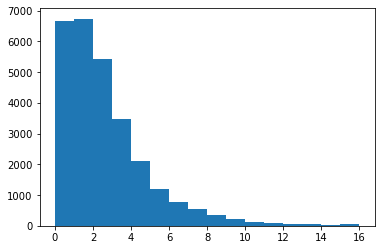

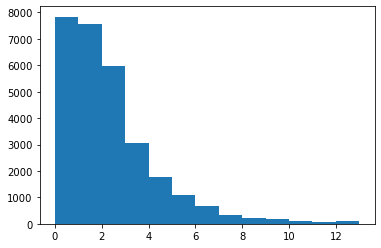

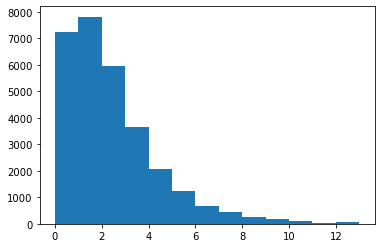

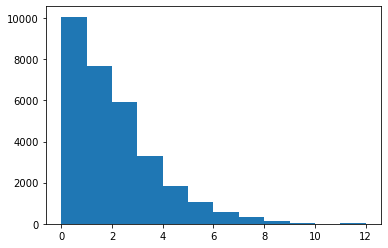

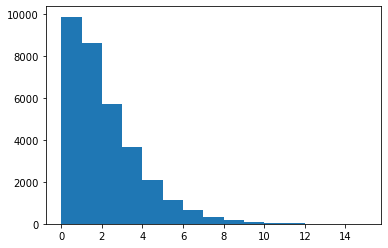

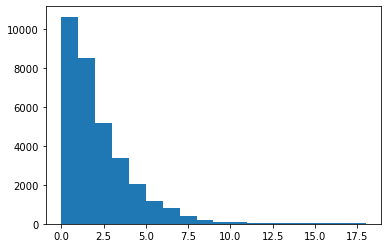

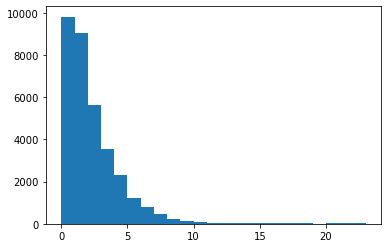

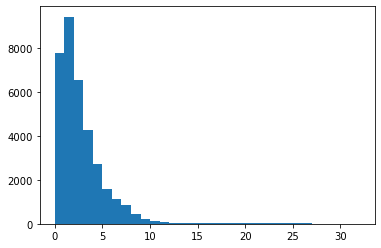

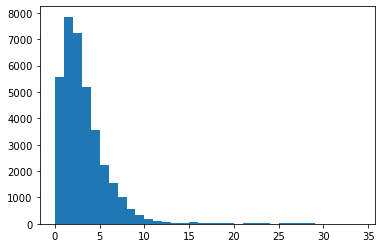

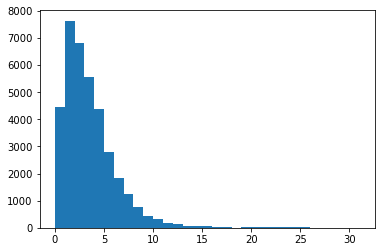

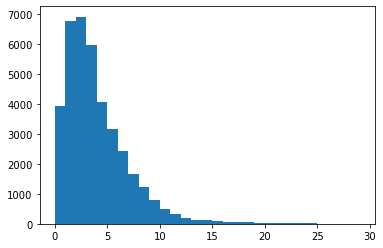

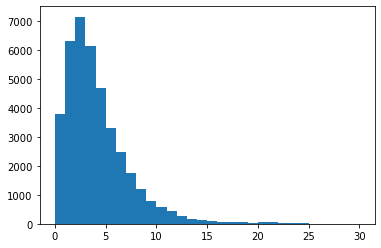

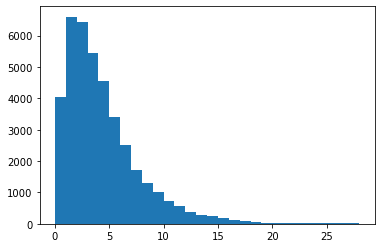

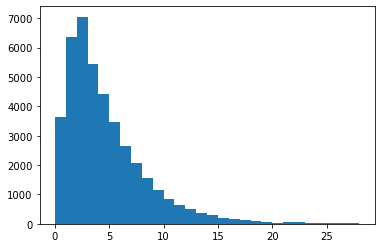

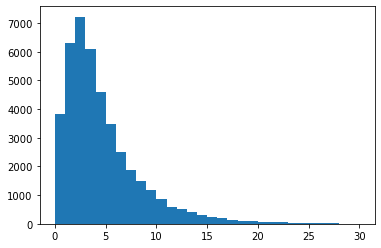

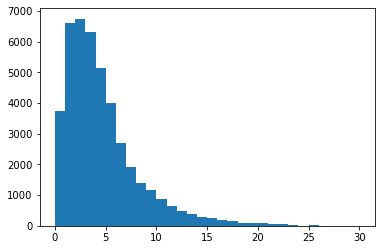

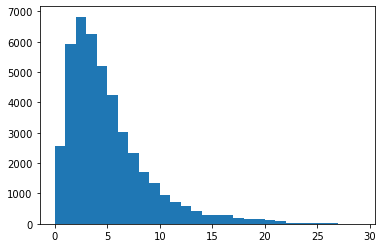

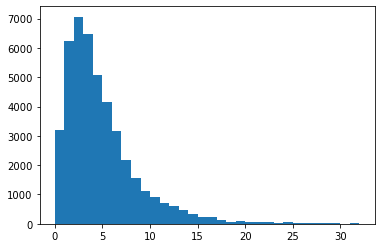

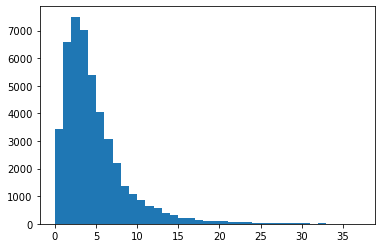

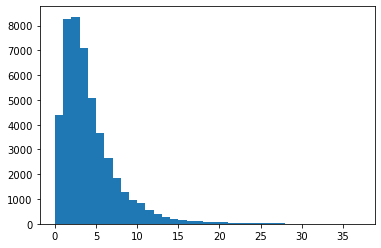

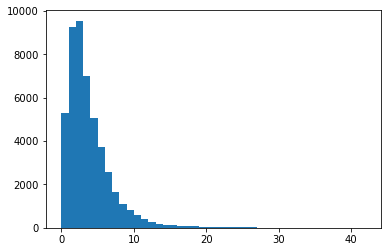

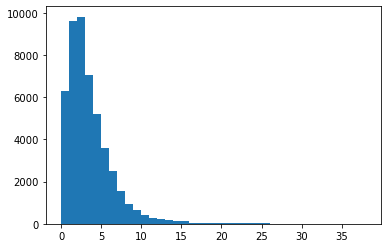

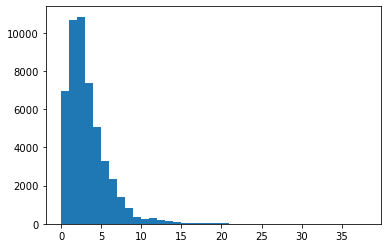

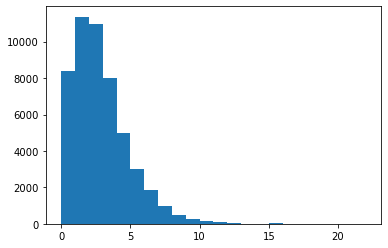

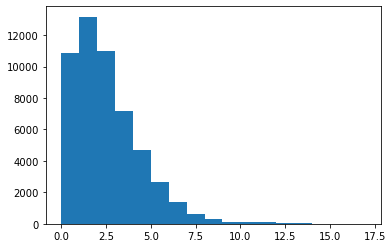

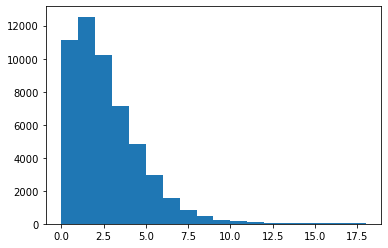

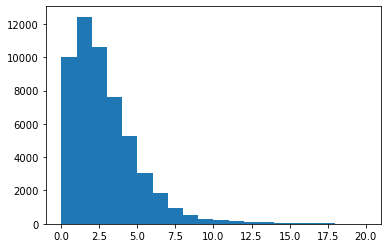

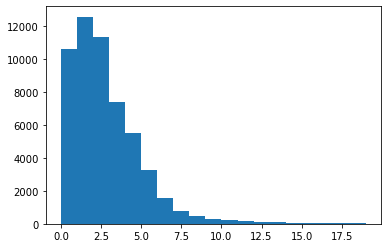

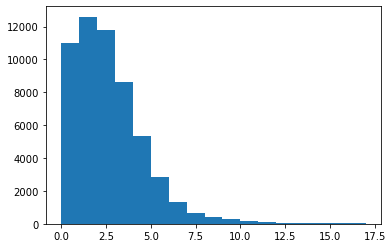

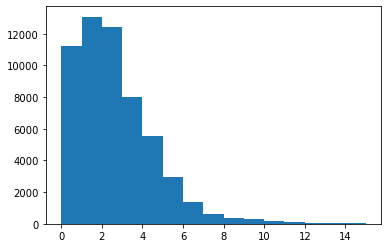

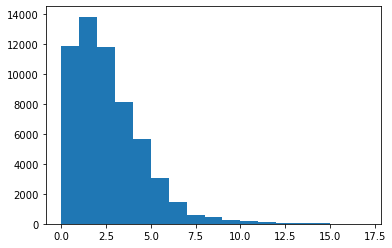

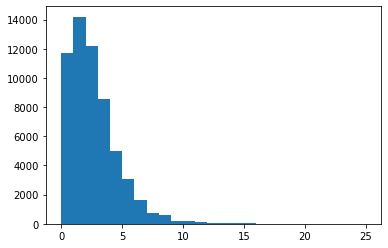

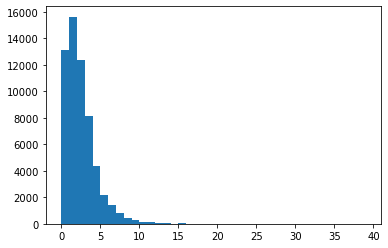

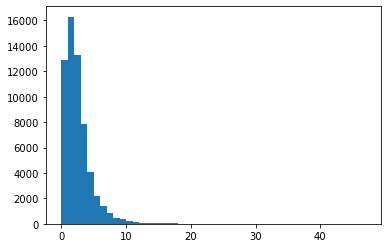

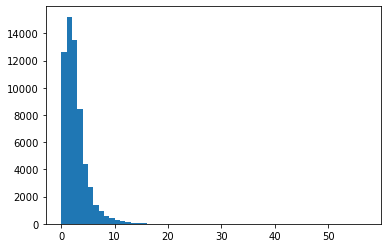

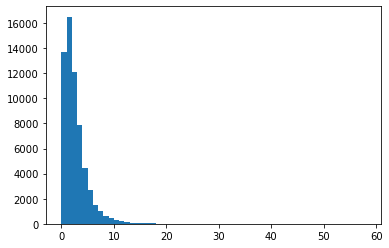

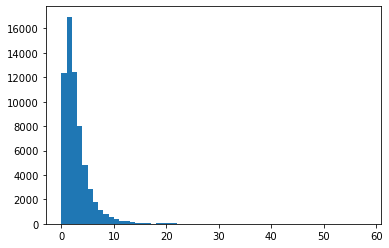

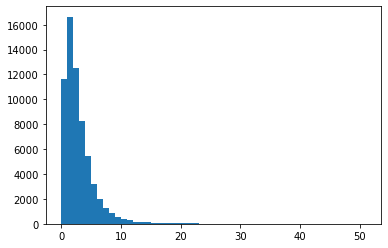

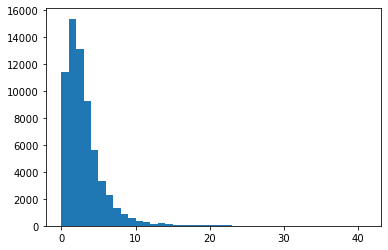

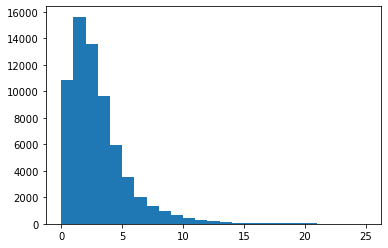

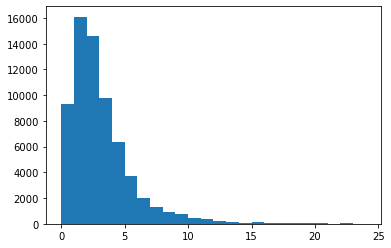

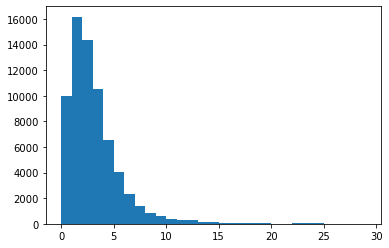

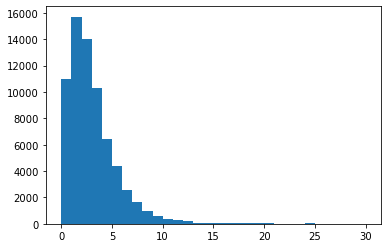

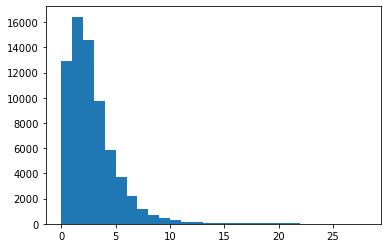

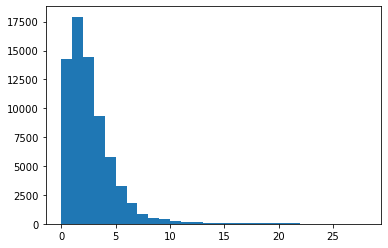

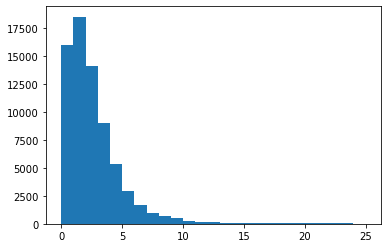

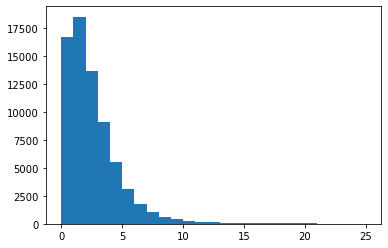

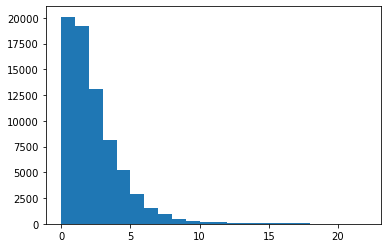

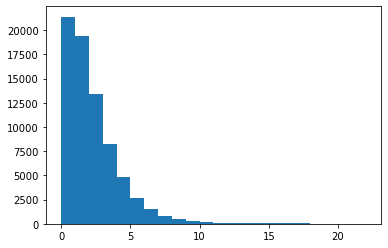

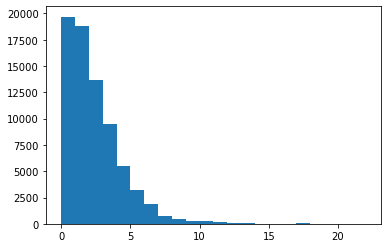

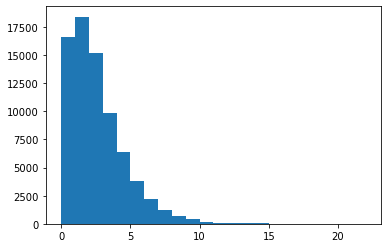

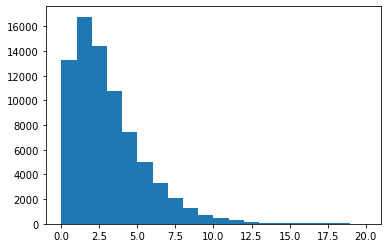

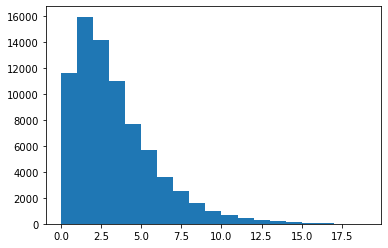

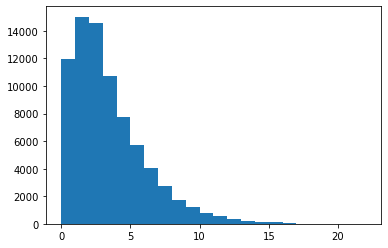

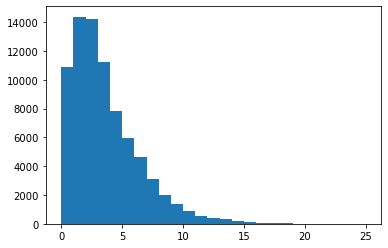

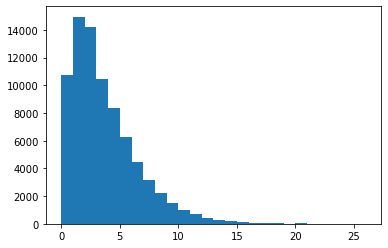

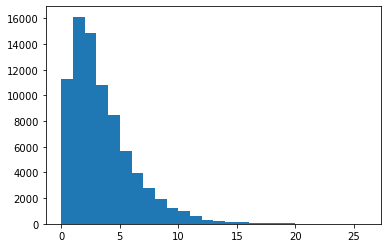

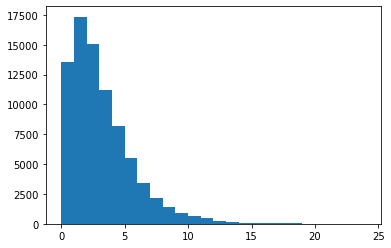

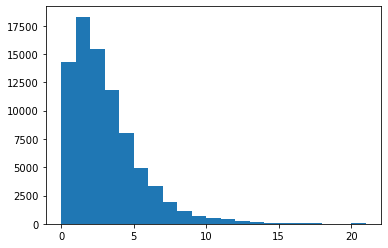

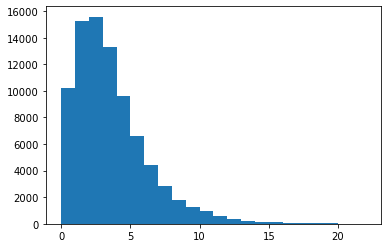

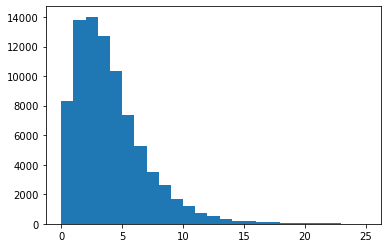

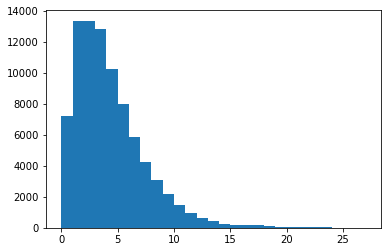

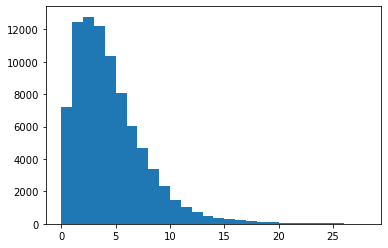

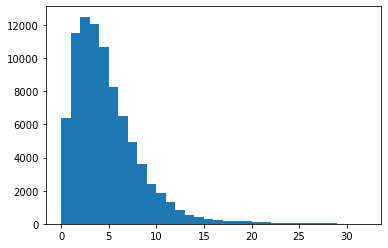

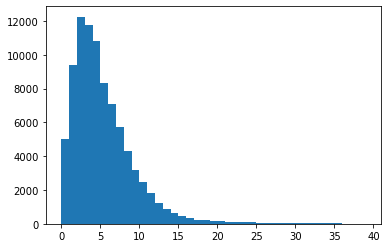

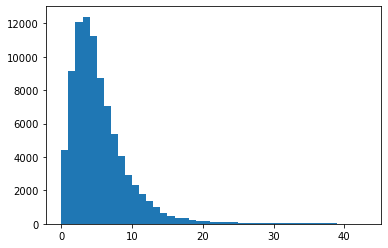

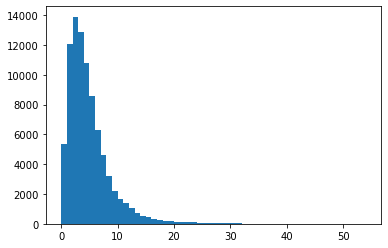

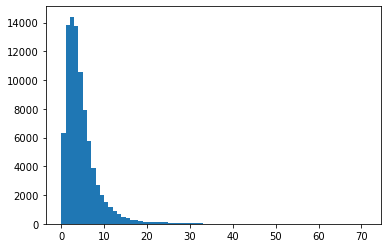

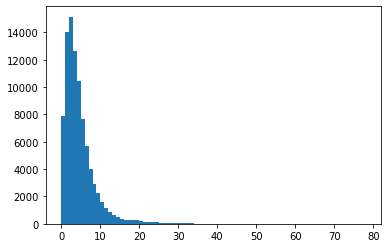

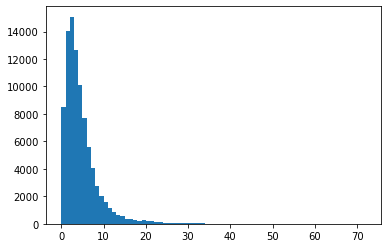

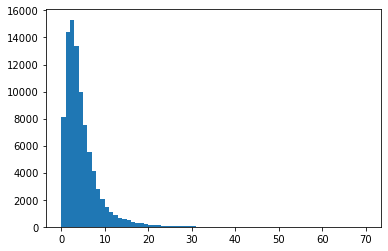

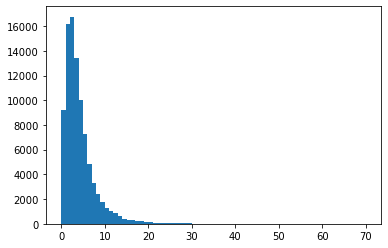

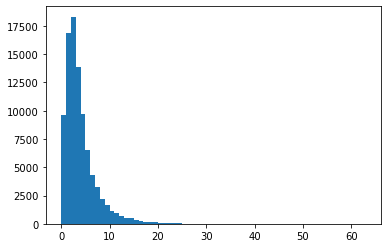

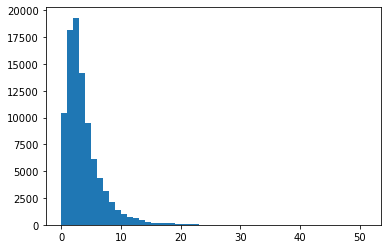

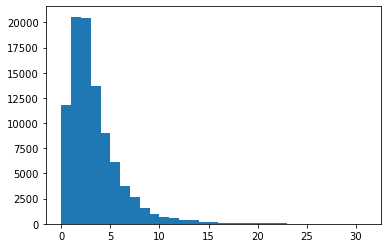

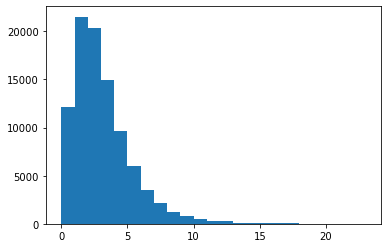

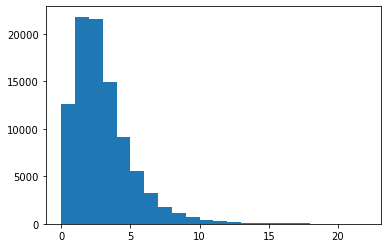

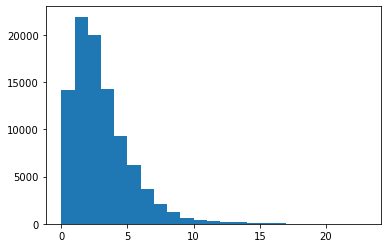

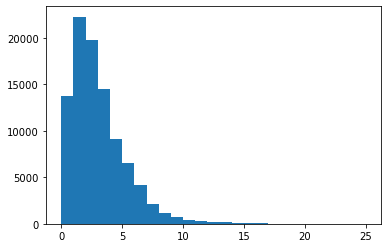

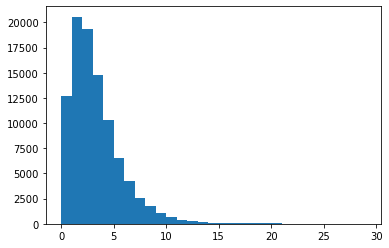

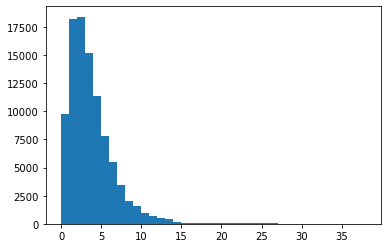

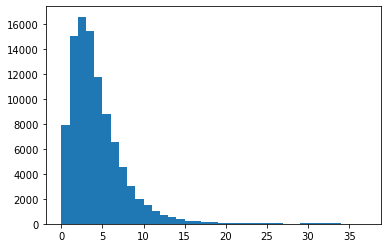

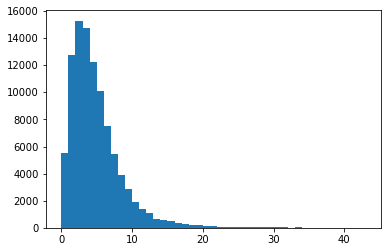

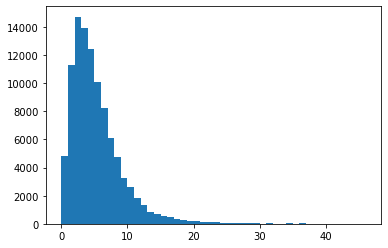

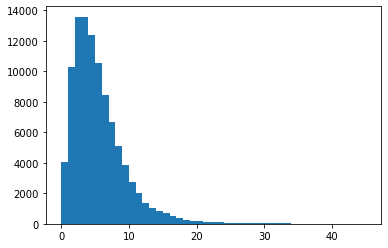

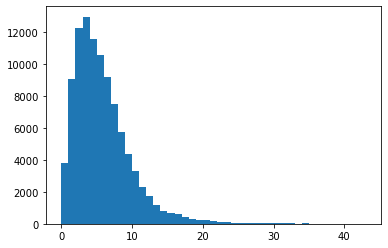

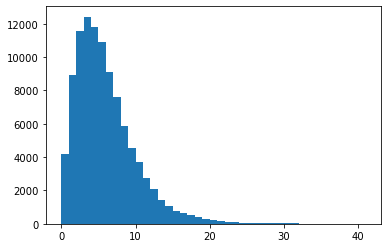

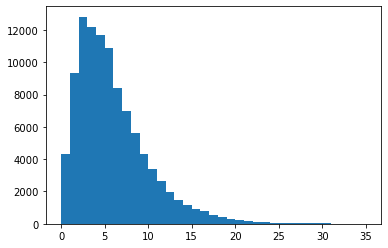

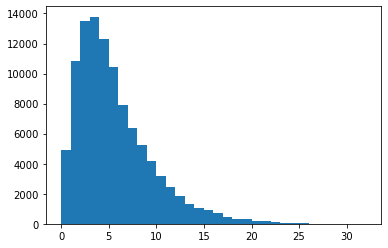

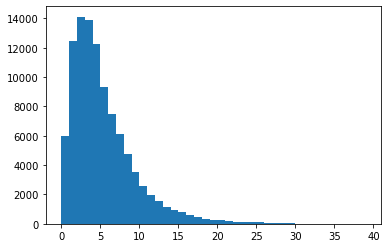

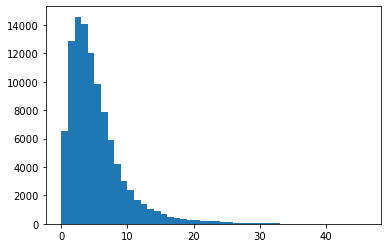

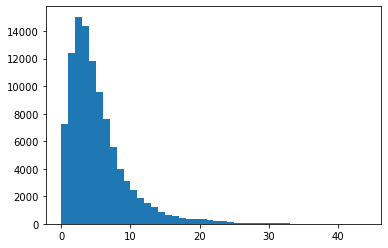

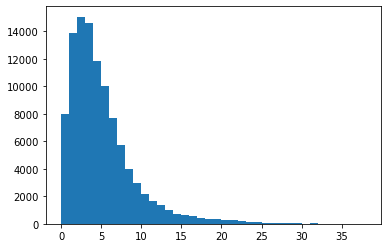

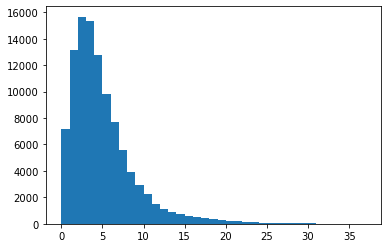

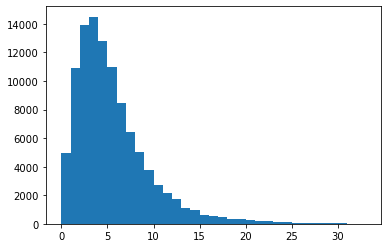

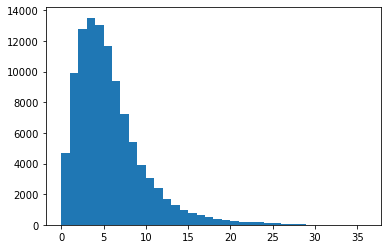

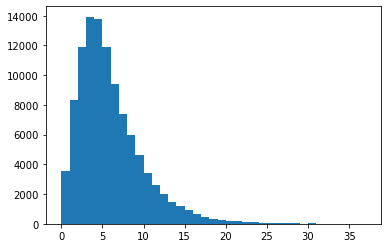

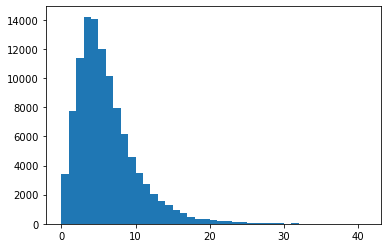

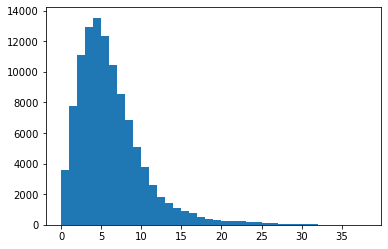

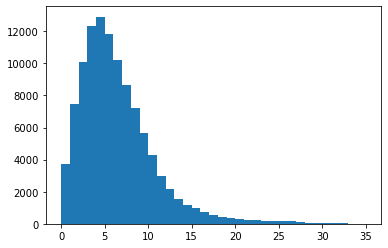

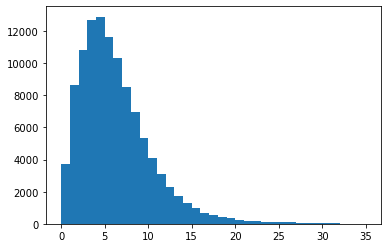

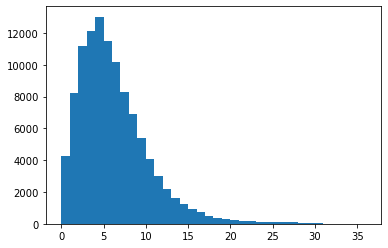

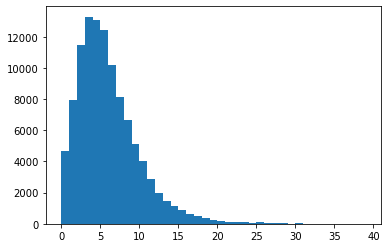

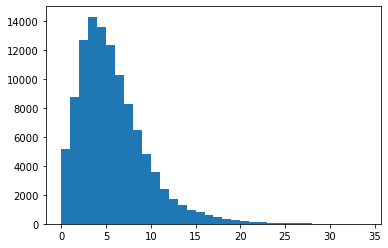

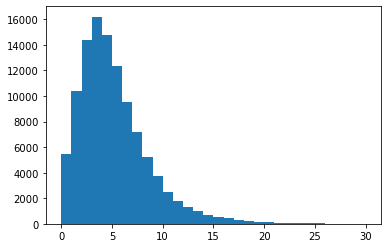

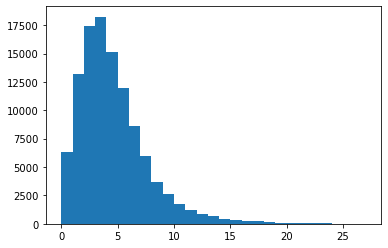

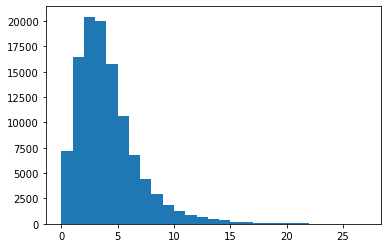

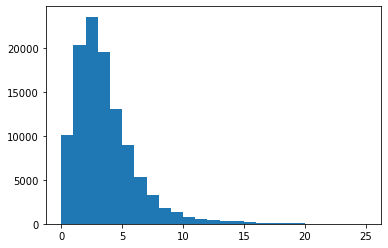

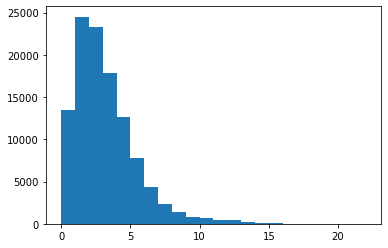

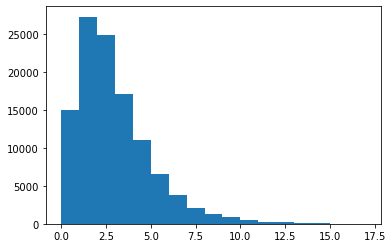

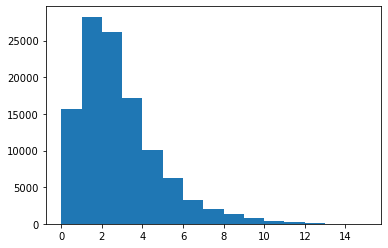

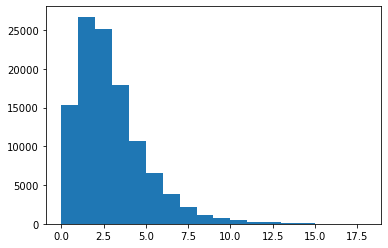

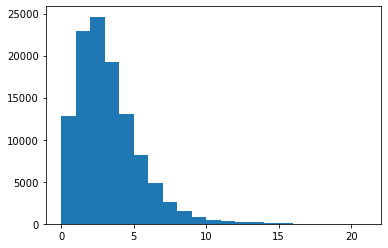

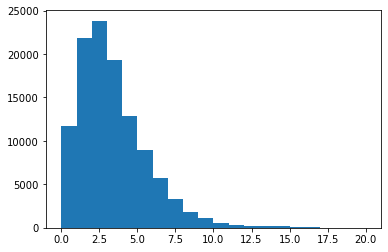

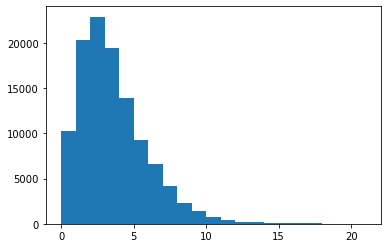

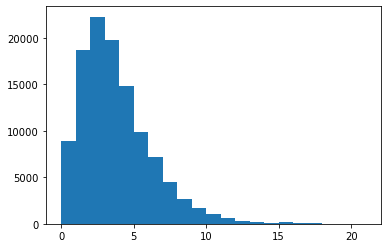

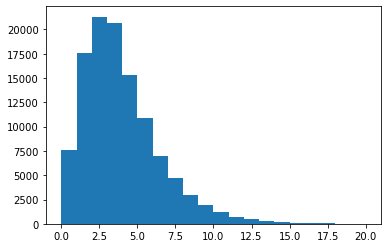

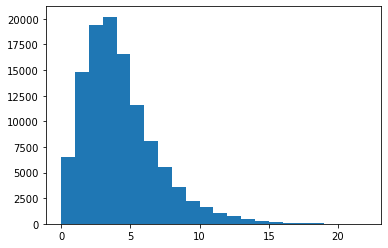

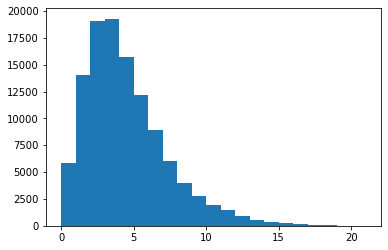

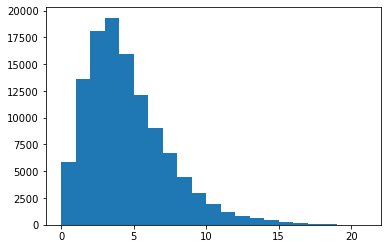

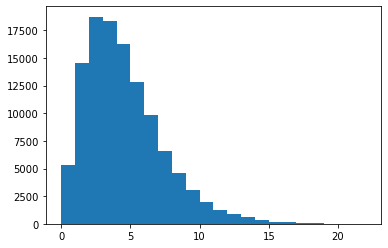

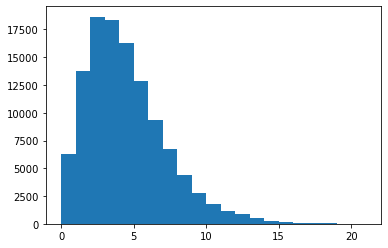

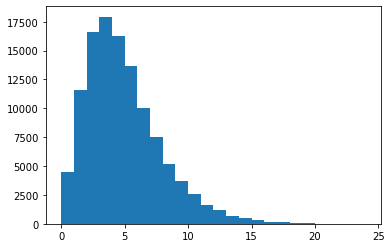

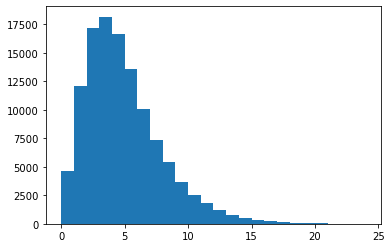

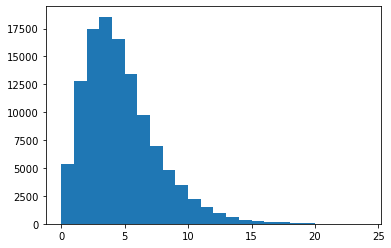

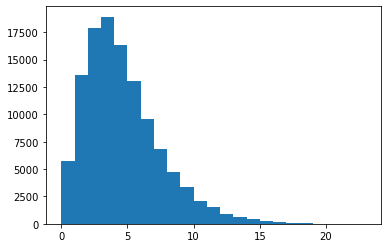

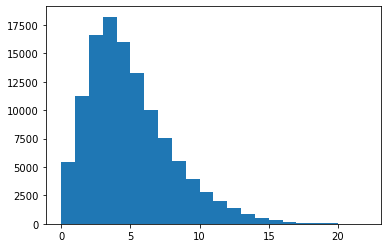

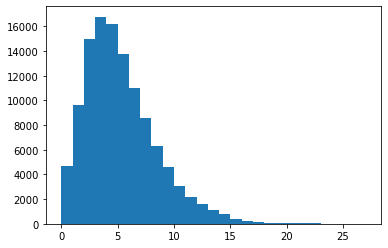

In [16]:
for i, v in enumerate(redshifts):
    grid = np.load('./bins/density_field/bins_new_all/' + file_list[i])
    mask1 = np.load('./bins/density_field/bins_new_all/mask1_10/' + mask1_list[i])
    mask2 = np.load('./bins/density_field/bins_new_all/mask2_10/' + mask2_list[i])
    
    
    
    grid_1d = grid[mask1 & mask2]

    plt.figure()
    
    plt.hist(grid_1d, bins = np.arange(min(grid_1d), max(grid_1d)+1))
    
#     mean = grid_1d.mean()
#     std = grid_1d.std()
    

## mock catalog

### construction

In [9]:
mock = pd.read_csv('datas/kitzbichler.csv', sep = ',', skiprows = 41)

/home/ehko/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
sample = mock[mock['M_stellar']*1e10 > 10**9.545]

In [11]:
sample.keys()

Index(['objectID', 'galaxyID', 'haloID', 'ra', 'dec', 'redshift_obs',
       'redshift_cosm', 'dist', 'cos_inc', 'SFR', 'M_stellar', 'M_B_stellar',
       'M_Z_stellar', 'B_J_nodust', 'V_J_nodust', 'R_J_nodust', 'I_J_nodust',
       'K_J_nodust', 'B_J', 'V_J', 'R_J', 'I_J', 'K_J', 'B_RF_J_nodust',
       'V_RF_J_nodust', 'R_RF_J_nodust', 'I_RF_J_nodust', 'K_RF_J_nodust',
       'B_RF_J', 'V_RF_J', 'R_RF_J', 'I_RF_J', 'K_RF_J', 'type', 'redshift'],
      dtype='object')

In [12]:
redshifts[80:]

array([0.57633, 0.5832 , 0.59009, 0.59701, 0.60396, 0.61094, 0.61795,
       0.62499, 0.63206, 0.63916, 0.64629, 0.65345, 0.66064, 0.66786,
       0.67511, 0.68239, 0.68971, 0.69706, 0.70444, 0.71185, 0.7193 ,
       0.72678, 0.73429, 0.74184, 0.74942, 0.75704, 0.76469, 0.77238,
       0.7801 , 0.78786, 0.79565, 0.80348, 0.81135, 0.81925, 0.82719,
       0.83517, 0.84319, 0.85124, 0.85933, 0.86746, 0.87563, 0.88384,
       0.89209, 0.90038, 0.90871, 0.91708, 0.92549, 0.93395, 0.94245,
       0.95099, 0.95957, 0.9682 , 0.97687, 0.98558, 0.99434, 1.00314,
       1.01199, 1.02088, 1.02982, 1.03881, 1.04784, 1.05692, 1.06605,
       1.07523, 1.08445, 1.09372, 1.10304, 1.11241, 1.12183, 1.1313 ,
       1.14082, 1.1504 , 1.16003, 1.16971, 1.17944, 1.18923, 1.19907,
       1.20897])

In [41]:
# consctruct density field
def construction2(i):
    bs = binsize[i] #binsize
    z = redshifts[i]
    zrange = sample[(sample['redshift_obs'] <=  z + bs) & (sample['redshift_obs'] >= z - bs)]
    
    print(f'{z : .4f}', end = ' ')
    
    #grid separation = 0.1Mpc
    gstep = find_grid_step(z)
    grid_ra = np.arange(min(zrange['ra']), max(zrange['ra']), gstep)
    grid_dec = np.arange(min(zrange['dec']), max(zrange['dec']), gstep)

    grid = np.zeros((len(grid_ra), len(grid_dec)))

    for i in range(len(grid_ra)):
#         if(i % 100 == 0):
#             print(i)
        for j in range(len(grid_dec)):
            #within 1Mpc, z -> z_cl +- error
            sr = find_search_radius(z)
            
            samp = zrange[((zrange['ra'] -  grid_ra[i])**2 + (zrange['dec'] - grid_dec[j])**2 < sr**2)]
            grid[i, j] = len(samp)
          
    np.save(f'./bins/density_field/bins_mock/bins_{z}_search700kpc', grid)        
    
    print(f'{z} completed')

In [42]:
n = 6 #number of cores to use
with mp.Pool(n) as p:
    print(p.map(construction2, range(80, len(redshifts))))

 0.5763 0.6321   0.6040 0.7193   0.6606  0.6897 0.5763300000001519 completed
 0.5832 0.6039600000005724 completed
 0.6109 0.6320600000009907 completed
 0.6392 0.6606400000014069 completed
 0.6679 0.6897100000018208 completed
 0.6971 0.7193000000022324 completed
 0.7268 0.5832000000002572 completed
 0.5901 0.6109400000006772 completed
 0.6180 0.639160000001095 completed
 0.6463 0.6678600000015106 completed
 0.6751 0.6970600000019239 completed
 0.7044 0.7267800000023349 completed
 0.7343 0.5900900000003624 completed
 0.5970 0.6179500000007818 completed
 0.6250 0.6462900000011991 completed
 0.6535 0.6751100000016141 completed
 0.6824 0.7044400000020269 completed
 0.7119 0.7342900000024373 completed
 0.7418 0.5970100000004674 completed
 0.7494 0.6249900000008863 completed
 0.7801 0.653450000001303 completed
 0.8114 0.6823900000017176 completed
 0.8432 0.7118500000021297 completed
 0.8756 0.7418400000025395 completed
 0.9087 0.7494200000026415 completed
 0.7570 0.7801000000030481 completed


### load 

In [13]:
file_list = os.listdir('./bins/density_field/bins_mock/')
file_list.sort()
file_list

['bins_0.5763300000001519_search700kpc.npy',
 'bins_0.5832000000002572_search700kpc.npy',
 'bins_0.5900900000003624_search700kpc.npy',
 'bins_0.5970100000004674_search700kpc.npy',
 'bins_0.6039600000005724_search700kpc.npy',
 'bins_0.6109400000006772_search700kpc.npy',
 'bins_0.6179500000007818_search700kpc.npy',
 'bins_0.6249900000008863_search700kpc.npy',
 'bins_0.6320600000009907_search700kpc.npy',
 'bins_0.639160000001095_search700kpc.npy',
 'bins_0.6462900000011991_search700kpc.npy',
 'bins_0.653450000001303_search700kpc.npy',
 'bins_0.6606400000014069_search700kpc.npy',
 'bins_0.6678600000015106_search700kpc.npy',
 'bins_0.6751100000016141_search700kpc.npy',
 'bins_0.6823900000017176_search700kpc.npy',
 'bins_0.6897100000018208_search700kpc.npy',
 'bins_0.6970600000019239_search700kpc.npy',
 'bins_0.7044400000020269_search700kpc.npy',
 'bins_0.7118500000021297_search700kpc.npy',
 'bins_0.7193000000022324_search700kpc.npy',
 'bins_0.7267800000023349_search700kpc.npy',
 'bins_0.734

/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


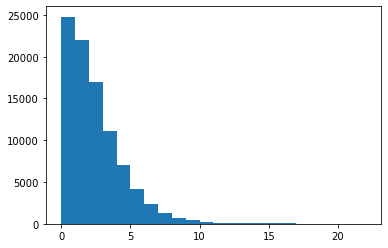

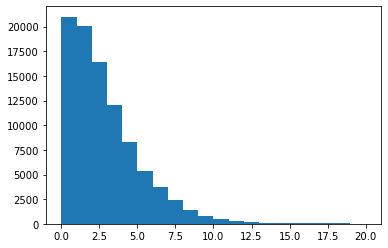

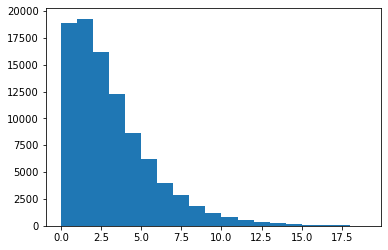

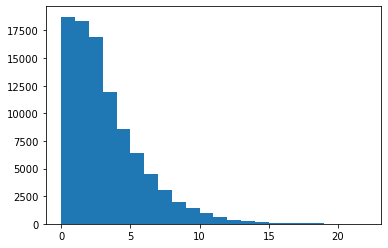

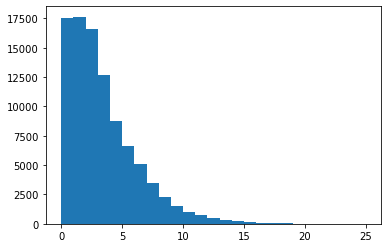

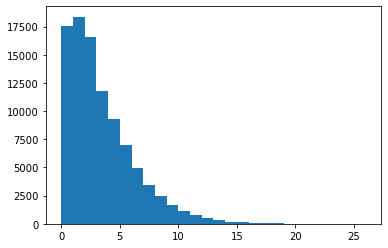

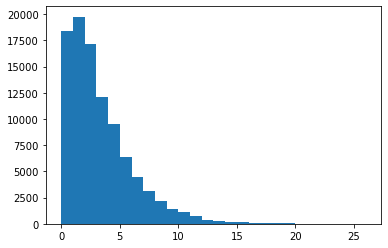

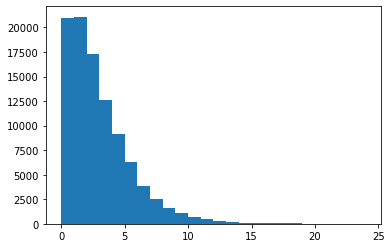

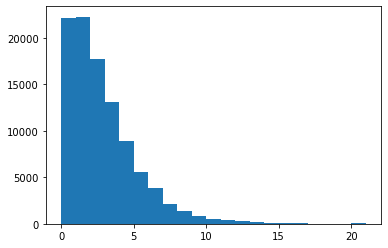

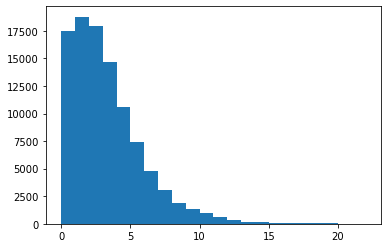

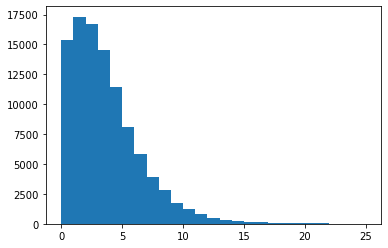

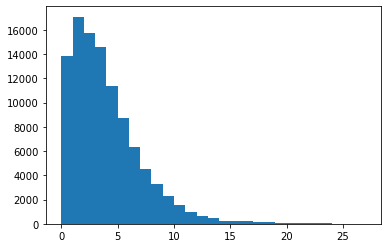

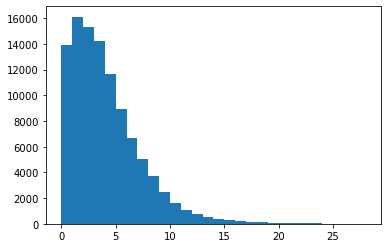

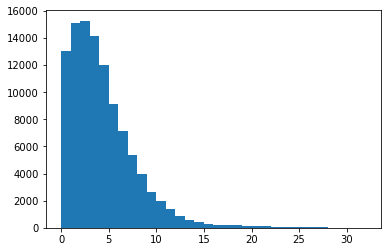

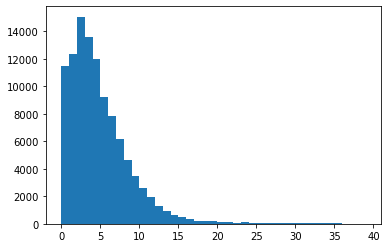

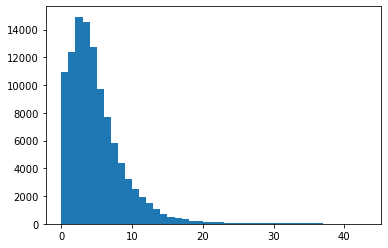

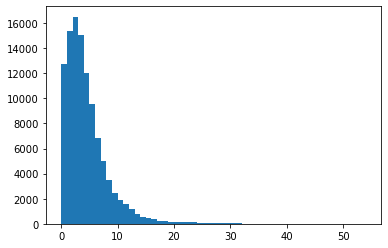

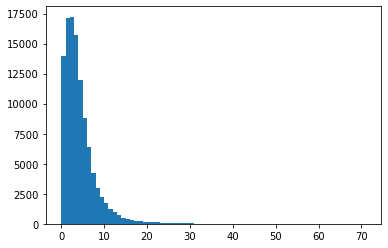

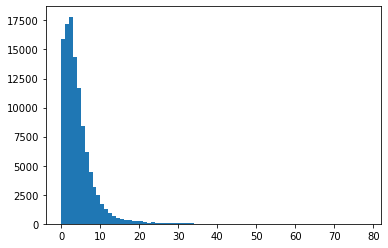

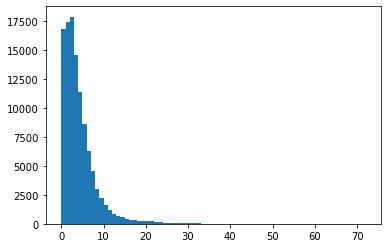

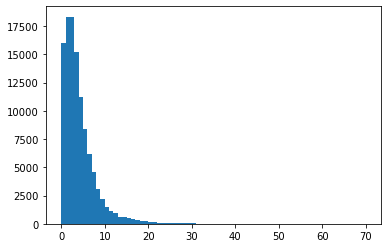

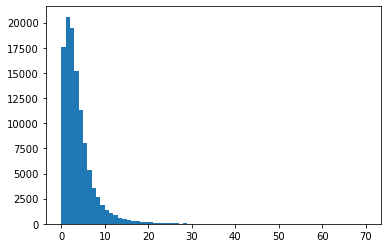

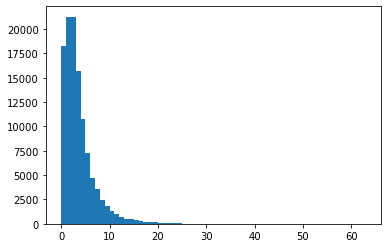

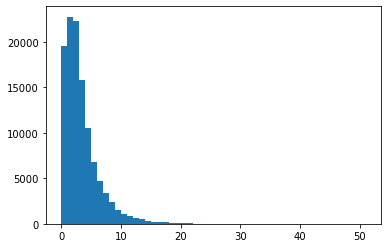

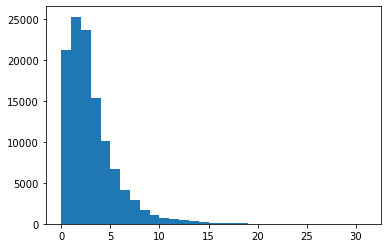

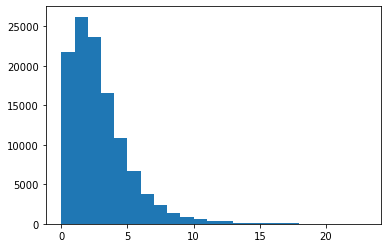

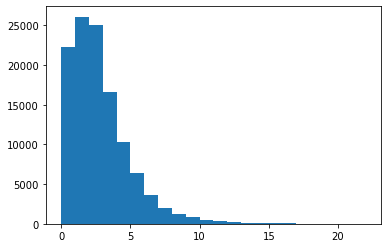

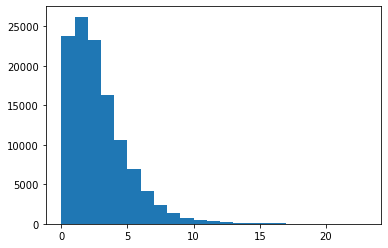

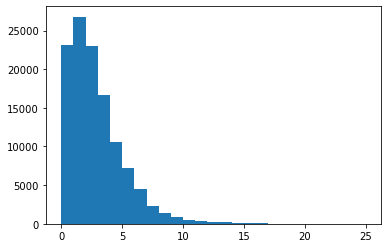

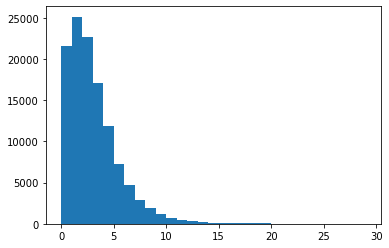

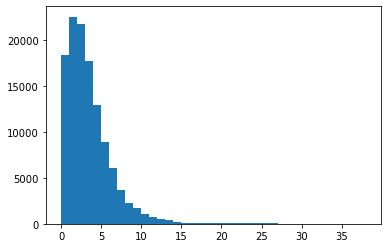

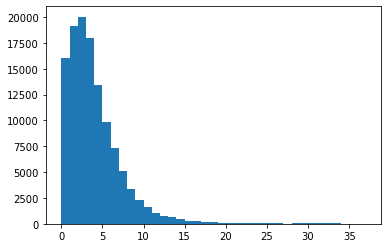

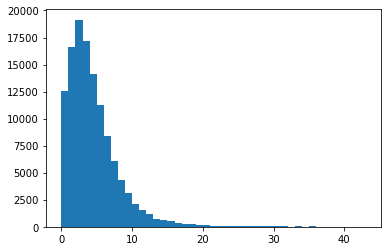

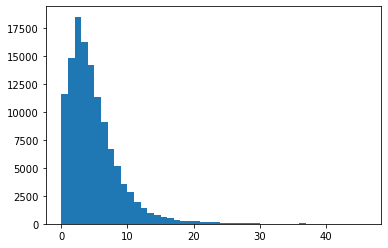

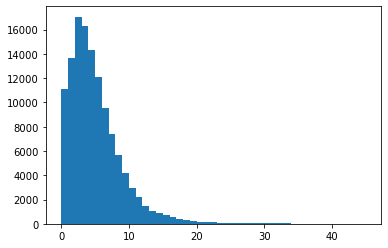

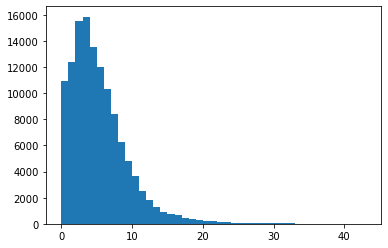

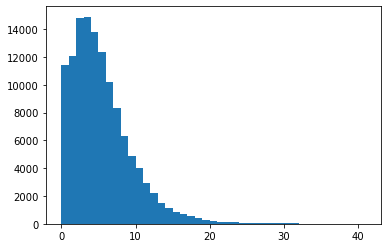

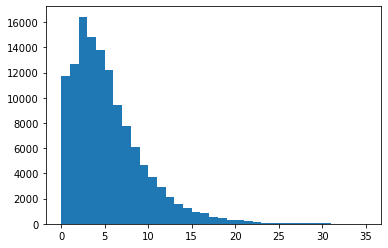

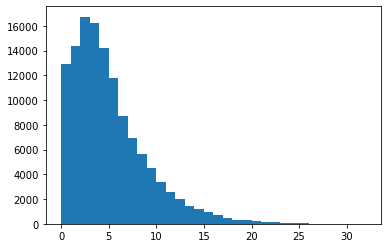

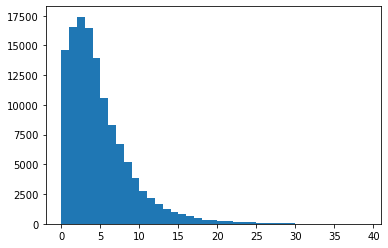

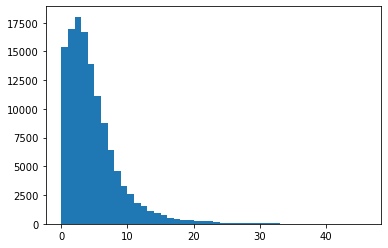

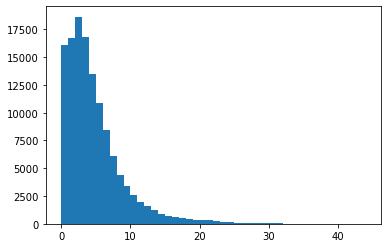

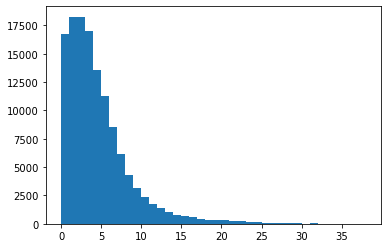

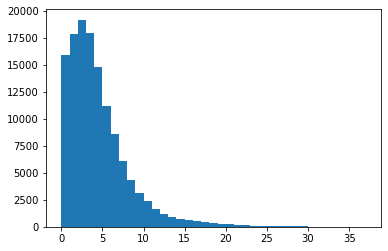

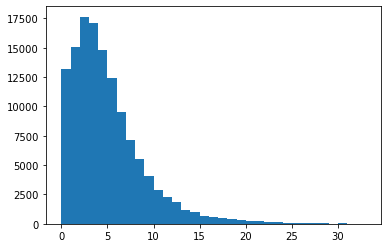

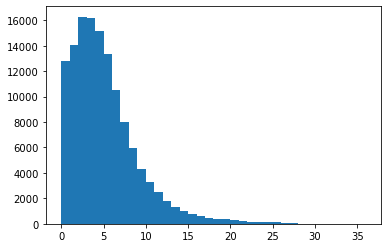

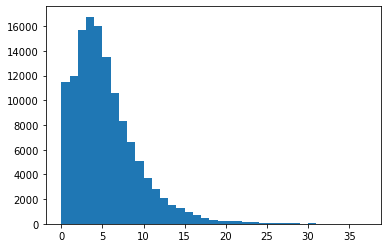

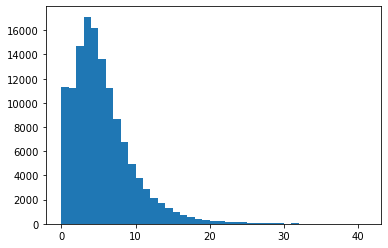

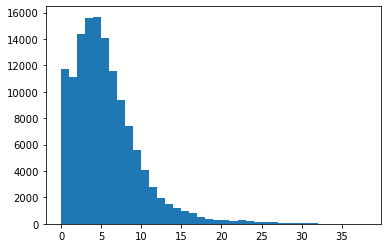

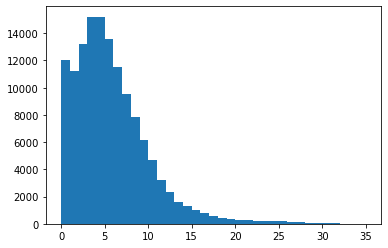

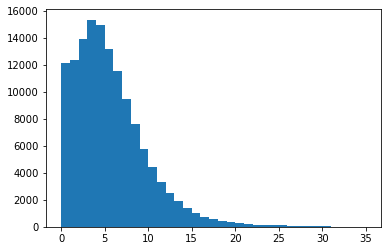

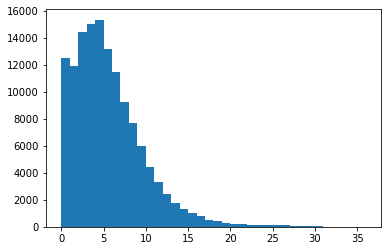

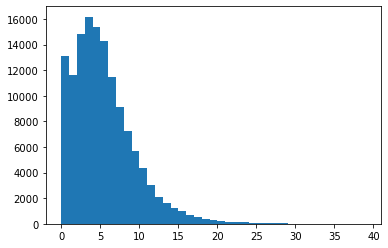

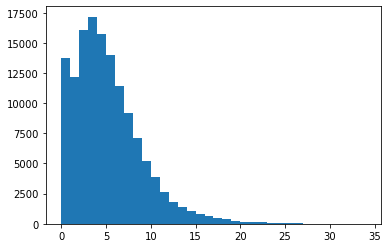

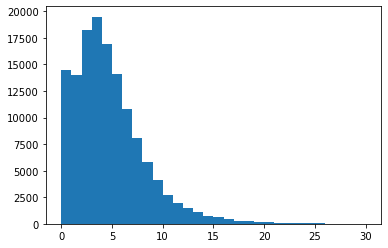

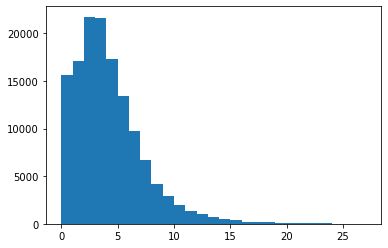

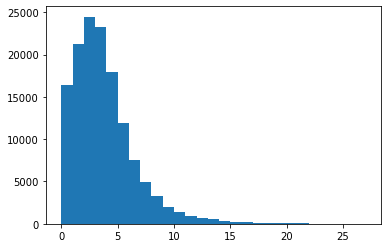

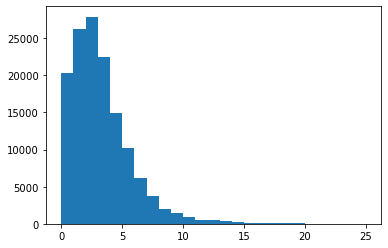

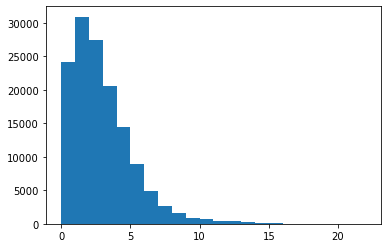

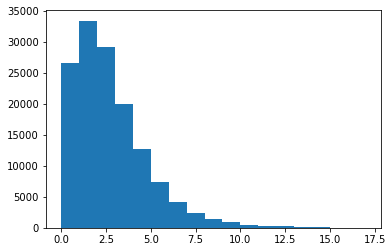

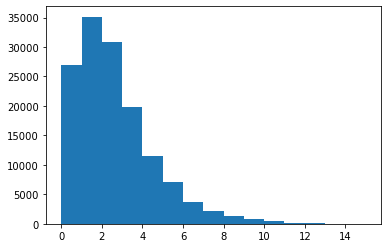

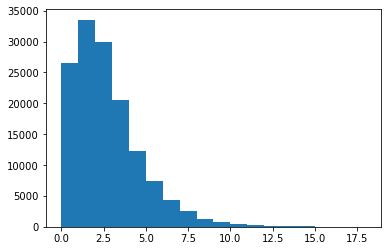

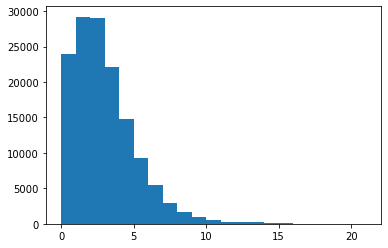

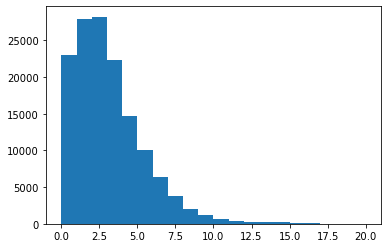

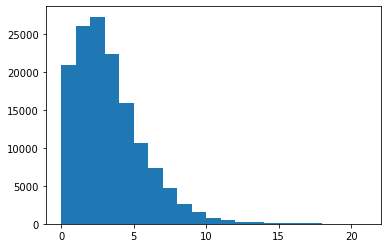

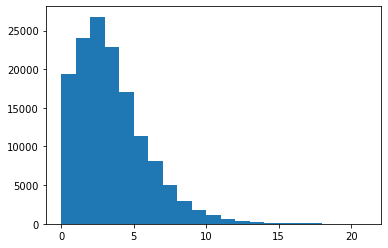

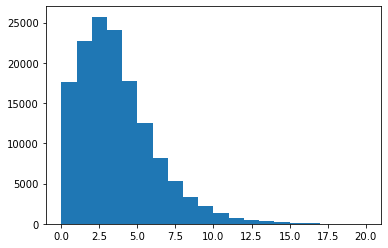

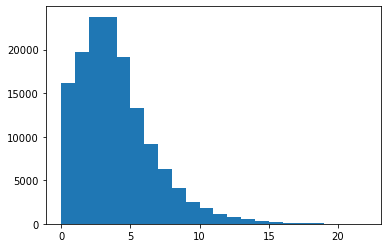

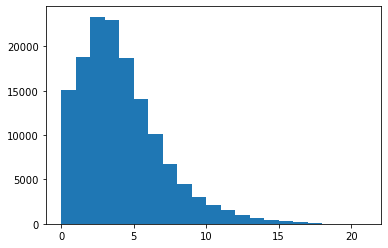

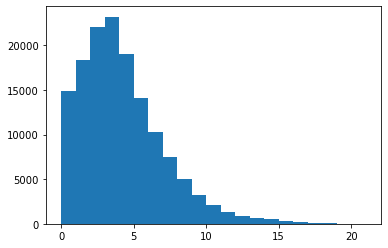

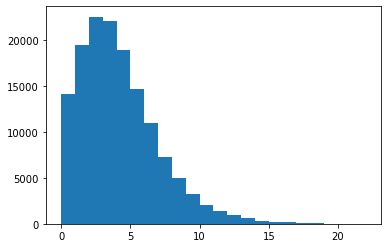

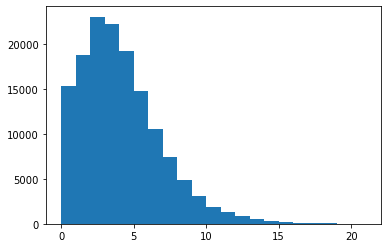

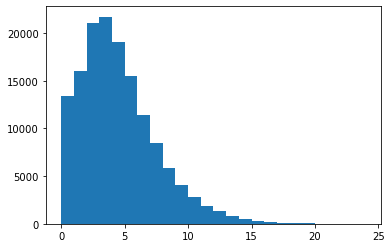

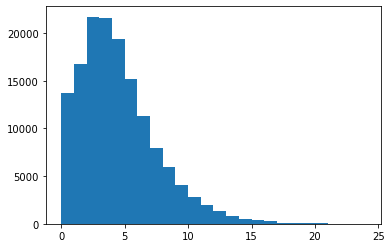

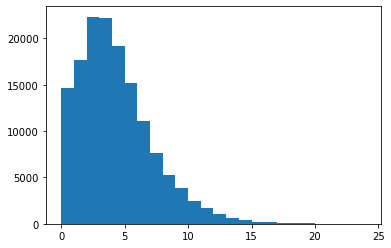

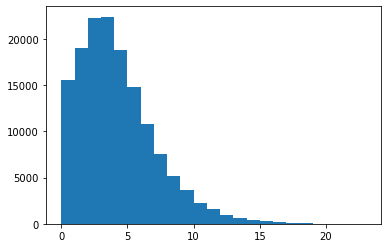

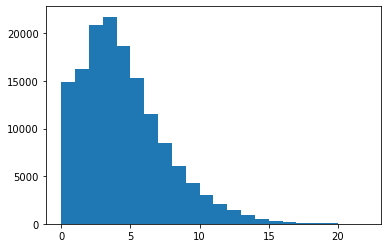

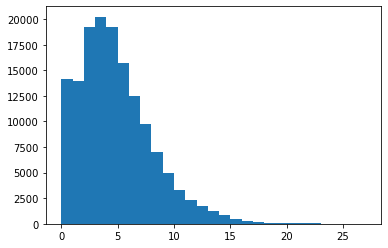

In [45]:
for i, v in enumerate(redshifts[80:]):
    grid = np.load('./bins/density_field/bins_new_all/' + file_list[i])
    
    grid_1d = np.concatenate(grid)

    plt.figure()
    
    plt.hist(grid_1d, bins = np.arange(min(grid_1d), max(grid_1d)+1))
    
#     mean = grid_1d.mean()
#     std = grid_1d.std()
    

In [52]:
# grid.shape
len(file_list)

78

In [14]:
od4_ra = []
od4_dec = []
od4_z = []

for i in range(len(file_list)):
# for i in range(1):
    od4_z_ra = []
    od4_z_dec = []
    od4_z_z = []
    print(i, end = ' ')
    grid = np.load('./bins/density_field/bins_mock/' + file_list[i])
    
    plt.figure()

    #grid separation = 0.1Mpc
    bs = binsize[i + 80] #binsize
    z = redshifts[i + 80]
    zrange = sample[(sample['redshift_obs'] <=  z + bs) & (sample['redshift_obs'] >= z - bs)]

    gstep = find_grid_step(redshifts[i+80])
    grid_ra = np.arange(min(zrange['ra']), max(zrange['ra']), gstep)
    grid_dec = np.arange(min(zrange['dec']), max(zrange['dec']), gstep)
    
    grid_x = np.zeros(grid.shape)
    grid_y = np.zeros(grid.shape)


    grid_y, grid_x = np.meshgrid(grid_dec, grid_ra)

    
    grid_1d = np.concatenate(grid)
    mean = grid_1d.mean()
    
    std = grid_1d.std()
    
    overdense_mask3 = grid >= mean + 3 * std
    sparse_mask3 = grid < mean + 3 * std
    
    overdense_mask4 = grid >= mean + 4 * std
    sparse_mask4 = grid < mean + 4 * std
        
    
    ras = grid_x[overdense_mask4]
    decs = grid_y[overdense_mask4]
    
    #save checked
    checked = np.full(ras.shape, True, dtype = bool)
    
    for k in range(len(ras)):
        #itself
        if not checked[k]:
            print('already checekd')
            continue
        else:
            print('find its first friends')
        
        ra = ras[k]
        dec = decs[k]
        checked[k] = False
        
#         temp_checked = []
        
        coord_mask = ((ras - ra)**2 + (decs - dec)**2 <= 2 * gstep**2)  
        check_index = np.where(ras[coord_mask & checked])[0]
        
        #if it has no member
        if len(ras[coord_mask & checked]) == 0:
            print('no friends found')
            continue
        
        #friends
        friends_ra = ras[coord_mask & checked]
        friends_dec = decs[coord_mask & checked]
        checked[check_index] = False
        
        #update
        final_ra = np.concatenate([np.array([ra]), friends_ra])
        final_dec = np.concatenate([np.array([dec]), friends_dec])
        
        #find its friends of friends
        flag = True
        first = True
        
        new_ra = np.array([])
        new_dec = np.array([])
        while flag:
            
            if first:
                first = False
                cand_ra = friends_ra.copy()
                cand_dec = friends_dec.copy()
            else:
                cand_ra = temp_ra.copy()
                cand_dec = temp_dec.copy()
                
            
            temp_ra = np.array([])
            temp_dec = np.array([])
            
            for l in range(len(cand_ra)):
                ra2 = cand_ra[l]
                dec2 = cand_dec[l]
                sec_index = np.where((ras == ra2) & (decs == dec2))[0]
                
                if not checked[sec_index]:
                    continue
                else:
                    checked[sec_index] = False
                
                coord_mask2 = ((ras - ra2)**2 + (decs - dec2)**2 <= 2 * gstep**2)
                check_index2 = np.where(ras[coord_mask2 & checked])[0] 
                
                if len(ras[coord_mask2 & checked])  == 0:
                    continue
                
                           
                #friends
                temp_ra = np.concatenate([temp_ra, ras[coord_mask2 & checked]])
                temp_dec = np.concatenate([temp_dec, decs[coord_mask2 & checked]])
 
                checked[check_index2] = False
            
            if len(temp_ra) > 0:
                print(f'+{len(temp_ra)}')
                new_ra = np.concatenate([new_ra, temp_ra])
                new_dec= np.concatenate([new_dec, temp_dec])
            else:
                flag = False
        
        
        final_ra = np.concatenate([final_ra, new_ra])
        final_dec = np.concatenate([final_dec, new_dec])
        
        if len(final_ra) > 10:        
            od4_z_ra.append(final_ra)
            od4_z_dec.append(final_dec)
            od4_z_z.append(i)
        else:
            print('less than 10 members')
    
    od4_ra.append(od4_z_ra)
    od4_dec.append(od4_z_dec)
    od4_z.append(od4_z_z)
    
    plt.figure()
    
    plt.scatter(grid_x[sparse_mask4], grid_y[sparse_mask4], s = 1, marker = 's', color = 'grey')
    plt.scatter(grid_x[overdense_mask4], grid_y[overdense_mask4], s = 1, marker = 's', color = 'pink')

    for l in range(len(od4_z_ra)):
        plt.scatter(od4_z_ra[l], od4_z_dec[l], s = 1, marker = 's', color = 'royalblue', alpha = 0.2)
    
    
    plt.xlim(min(sample['ra']), max(sample['ra']))
    plt.ylim(min(sample['dec']), max(sample['dec']))

    

0 find its first friends
+8
+18
+24
+30
+34
+24
+4
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+12
+21
+34
+49
+53
+46
+31
+20
+19
+23
+11
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+13
+20
+24
+21
+23
+27
+9
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
alread

+3
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+11
+16
+15
+23
+25
+28
+28
+14
+2
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already che

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd


already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+3
+5
+6
+5
+5
+4
+1
+2
+2
+3
+4
+5
+4
+4
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+13
+30
+43
+50
+54
+55
+58
+53
+47
+41
+24
+10
+1
already checekd
already checek

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

+7
+10
+14
+15
+16
+19
+19
+20
+21
+20
+11
+11
+10
+6
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
al

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+5
+8
+10
+13
+16
+17
+20
+14
+11
+8
+8
+6
+2
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
alre

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+9
+11
+6
+10
+14
+12
+14
+14
+5
+2
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
a

/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


find its first friends
+3
+10
+18
+22
+25
+25
+26
+27
+27
+27
+18
+14
+8
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already chec

/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


11 find its first friends
+2
+2
less than 10 members
already checekd
find its first friends
+3
+4
+4
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+2
+3
+2
+1
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+1
+1
+1
+1
+1
less than 10 members
find its first friends
+4
+5
+2
+1
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+2
+3
+1
+1
less than 10 members
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
already checekd
already checekd
already checekd
already

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+13
+27
+43
+53
+60
+66
+68
+71
+80
+84
+86
+79
+77
+63
+51
+38
+20
+3
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already ch

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+11
+7
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+1
+4
+18
+34
+49
+66
+76
+87
+84
+84
+87
+82
+79
+76
+64
+54
+36
+18
+3
already checekd
find its first friends
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+14
+20
+27
+37
+40
+33
+28
+22
+12
+3
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd


find its first friends
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+14
+29
+36
+44
+41
+29
+25
+6
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already ch

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+12
+25
+37
+48
+56
+64
+72
+75
+42
+4
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+14
+12
+2
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+7
+1
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+5
+7
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+18
+28
+39
+50
+48
+50
+51
+51
+50
+51
+48
+47
+38
+17
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
alread

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
less than 10 members
already checekd
find its first friends
+13
+17
+21
+11
+4
+1

find its first friends
+16
+24
+27
+20
+10
+2
+1
+1
already checekd
already checekd
already checekd
find its first friends
+16
+23
+28
+18
+13
+3
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+14
+8
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
alrea

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+4
+7
+10
+13
+16
+19
+22
+25
+28
+25
+19
+17
+17
+17
+17
+16
+12
+11
+11
+8
+4
+2
+1
already checekd
already checekd
already checekd
find its first friends
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
find its first friends
no friends found
find its first friends
+4
+5
+5
+5
+4
+2
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+3
+7
+10
+9
+10
+9
+10
+6
+3
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
al

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd


already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
36 find its first friend

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+18
+33
+45
+55
+65
+72
+79
+84
+91
+98
+102
+97
+95
+92
+91
+88
+89
+84
+79
+77
+77
+78
+79
+78
+79
+72
+65
+62
+65
+54
+49
+45
+41
+41
+39
+35
+34
+33
+26
+5
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
a

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd

already checekd
find its first friends
+3
+3
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
less than 10 members
already checekd
43 find its first friends
+3
+6
+9
+13
+16
+19
+22
+24
+23
+17
+16
+15
+15
+14
+12
+11
+2
already checekd
already checekd
already

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
find its first friends
+14
+21
+25
+25
+18
+5
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+17
+30
+47
+56
+62
+64
+68
+71
+59
+48
+38
+20
+3
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
find its first friends
less than 10 members
already checekd
find its first friends
+16
+25
+36
+39
+29
+29
+22
+17
+4
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+7
+4
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already chece

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekdalready checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
a

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+18
+31
+41
+50
+57
+64
+66
+55
+45
+41
+28
+5
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
al

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+3
+6
+9
+12
+14
+16
+17
+18
+20
+21
+21
+22
+23
+20
+2
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd

+1
+1
less than 10 membe

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

no friends found
find its first friends
+1
+1
+2
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+4
+7
+11
+14
+17
+20
+18
+20
+21
+22
+23
+23
+23
+25
+27
+23
+20
+14
+12
+10
+2
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already ch

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+1
+2
+4
+3
+2
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
55 find its first friends
+7
+17
+26
+32
+20
+13
+3
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+11
+1
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
find its first friends
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
+18
+9
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+7
+16
+32
+34
+40
+43
+48
+54
+60
+63
+62
+56
+40
+17
+3
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+5
+6
+10
+12
+12
+18
+17
+20
+28
+29
+22
+29
+29
+26
+30
+26
+18
+20
+16
+7
+2
already checekd
already checekd
already checekd
already checekd
find its first friends
+2
+7
+24
+24
+23
+36
+43
+35
+30
+42
+48
+37
+30
+33
+23
+17
+17
+8
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
al

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+16
+22
+23
+21
+19
+26
+33
+37
+32
+15
+2
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
alread

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
find its first friends
less than 10 members
find its first friends
less than 10 members
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+3
+3
+3
+2
+1
already checekd
already checekd
al

already checekd
already checekd
already checekd
already checekd
find its first friends
less than 10 members
already checekd
find its first friends
+14
+23
+32
+40
+48
+54
+56
+58
+57
+41
+20
+10
+1
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+13
+28
+38
+45
+56
+63
+68
+72
+65
+50
+43
+31
+6
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+4
+6
+9
+12
+15
+17
+18
+20
+23
+25
+26
+27
+28
+27
+25
+20
+18
+16
+14
+13
+12
+6
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already chece

+18
+8
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
a

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
+5
+8
+8
+11
+14
+16
+18
+20
+23
+25
+24
+26
+29
+31
+31
+30
+29
+24
+21
+19
+10
+7
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already chece

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
find its first friends
no friends found
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd


already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already checekd
already 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
index1 = []
index2 = []
zstart = []
zend = []

check_1 = np.array([])
check_2 = np.array([])

for z in range(len(od4_ra)-1):
    print(f'start {z}', end = ' ')
    for i in range(len(od4_ra[z])):
        if len(od4_ra[z][i]) > 4:
            print('enough connection')
        else:
            print('not enough connection')
            continue
        
        ra_center = od4_ra[z][i].mean()
        dec_center = od4_dec[z][i].mean()
        
        zlist = []
        zlist.append(z)
        jlist = []
        jlist.append(i)
        
        startlist = []
        startlist.append(z)
        endlist = []
        
        zz = z  + 1
        print(' find its friends')
        while True:
            if zz == len(od4_ra) - 1:
                endlist.append(zz)
                print(' out of index')
                break
            num = 0
            for j in range(len(od4_ra[zz])):
                ra_cand = od4_ra[zz][j].mean()
                dec_cand = od4_dec[zz][j].mean()
            
                if (ra_center - ra_cand)**2 + (dec_center - dec_cand)**2 < 0.0005:
                    zlist.append(zz)
                    jlist.append(j)
                    num += 1
            if num == 0:
                endlist.append(zz)
                break
            
            zz += 1
            
        if sum(np.isin(check_1, zlist) & np.isin(check_2, jlist)) > 0:
            print(' already counted')
        else:
            if len(zlist) > 2:
                print(' found!')
                index1.append(zlist)
                index2.append(jlist)
                
                zstart.append(startlist)
                zend.append(endlist)
                
                check_1 = np.concatenate([check_1, np.array(zlist)])
                check_2 = np.concatenate([check_2, np.array(jlist)])
#         plt.scatter(od3_ra[z][i], od3_dec[z][i], color = 'salmon')
#         plt.scatter

start 0 enough connection
 find its friends
 found!
enough connection
 find its friends
enough connection
 find its friends
enough connection
 find its friends
enough connection
 find its friends
 found!
enough connection
 find its friends
 already counted
enough connection
 find its friends
 found!
enough connection
 find its friends
 already counted
enough connection
 find its friends
enough connection
 find its friends
enough connection
 find its friends
enough connection
 find its friends
 found!
enough connection
 find its friends
 already counted
enough connection
 find its friends
enough connection
 find its friends
 found!
start 1 enough connection
 find its friends
 already counted
enough connection
 find its friends
enough connection
 find its friends
enough connection
 find its friends
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its frien

 already counted
enough connection
 find its friends
 found!
enough connection
 find its friends
 already counted
enough connection
 find its friends
enough connection
 find its friends
 already counted
enough connection
 find its friends
enough connection
 find its friends
 already counted
enough connection
 find its friends
 found!
enough connection
 find its friends
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
start 26 enough connection
 find its friends
 found!
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 found!
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
e

enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 found!
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
enough connection
 find its friends
 already counted
enough connection
 find its friends
enough connection
 find its friends
 already counted
start 54 enough connection
 find its friends
 already counted
enough connection
 find its friends
 already counted
enough connection
 find its friends
enough connection
 find its friends
enough connection
 find its friends
enough connection
 find its friends
enough connection
 find its friends
enough

 already counted
enough connection
 find its friends
 out of index
enough connection
 find its friends
 out of index
enough connection
 find its friends
 out of index
enough connection
 find its friends
 out of index
 already counted
enough connection
 find its friends
 out of index


In [16]:
len(index1)

84

In [17]:
#find search radius: 1000kpc
def search_radius(z):
    r = cosmo.arcsec_per_kpc_proper(z) * 1000 * u.kpc # arcsec

    return r.to(u.deg).value
def lin_func(x, a):
    return a*x

In [18]:
halos = sample['haloID']

In [19]:
halos = sample.groupby(sample['haloID']).size() 
hmask = halos >= 5
hs = halos[hmask]

In [20]:
hs_ra = []
hs_dec = []
hs_z = []
hs_id = []

for i in range(len(hs)):
    temp = sample[sample['haloID'] == hs.index[i]]
    
    hs_ra.append(temp['ra'].mean())
    hs_dec.append(temp['dec'].mean())
    hs_z.append(temp['redshift_obs'].mean())
    hs_id.append(hs.index[i])
    
hs_ra = np.array(hs_ra)
hs_dec = np.array(hs_dec)
hs_z = np.array(hs_z)
hs_id = np.array(hs_id)

In [101]:
# sample.keys()
len(hs_id)

1250

/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


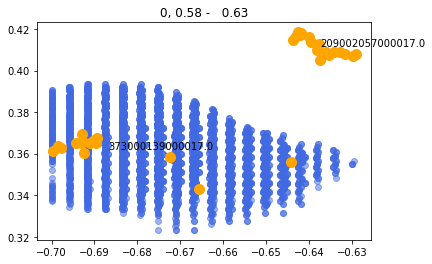

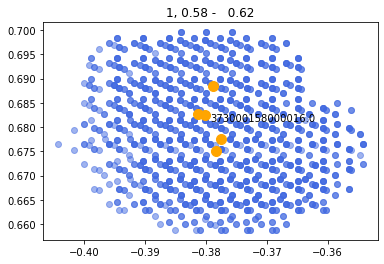

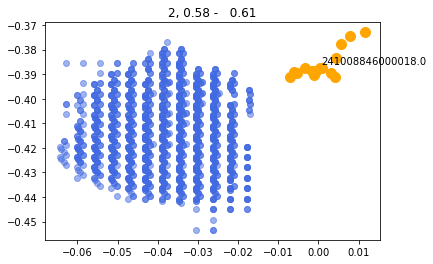

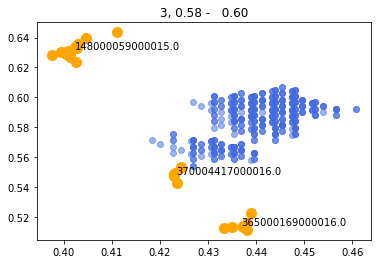

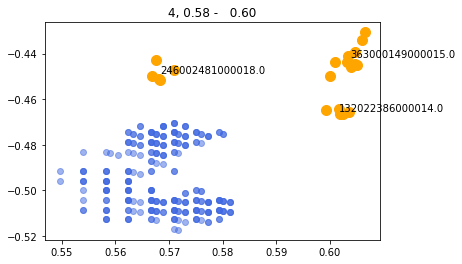

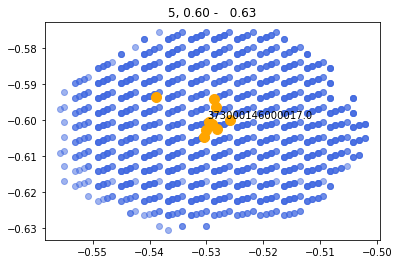

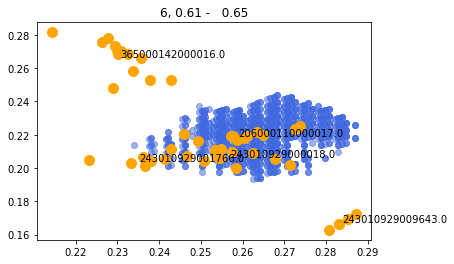

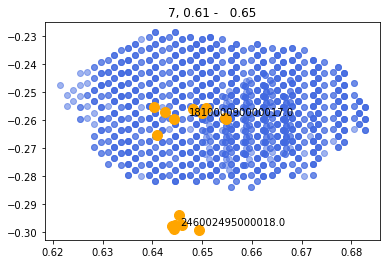

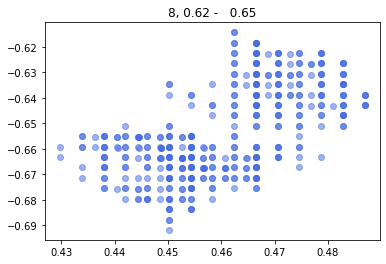

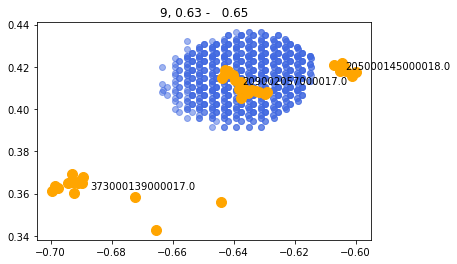

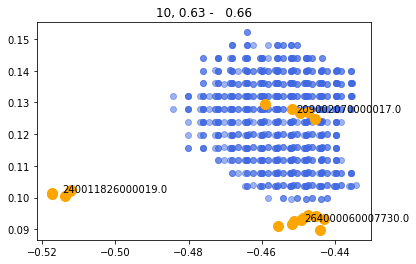

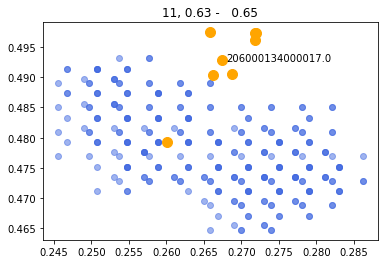

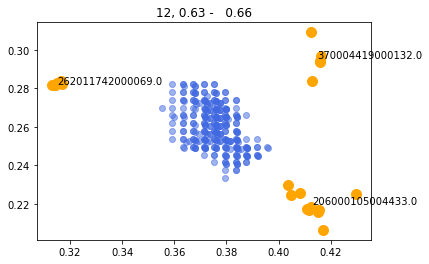

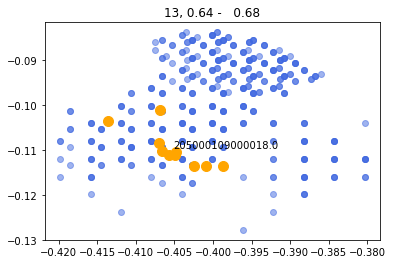

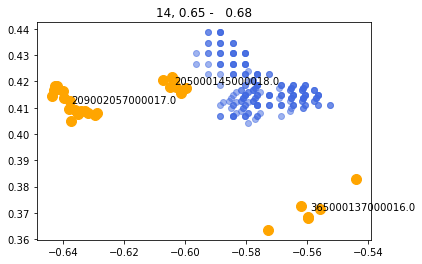

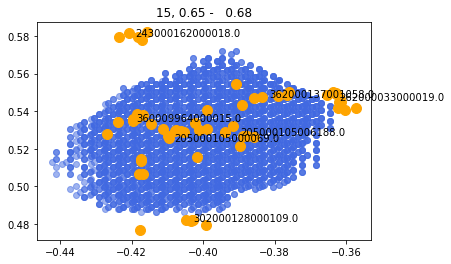

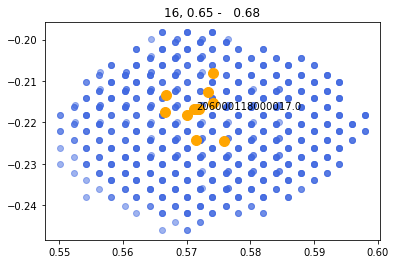

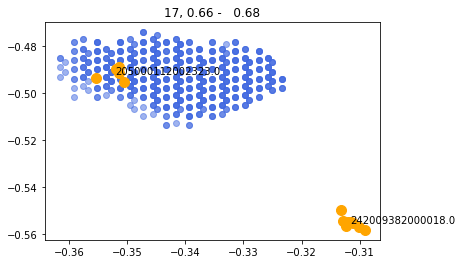

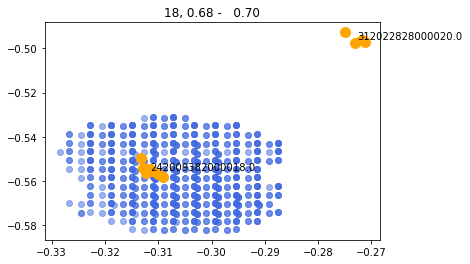

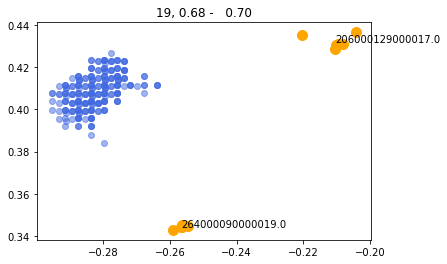

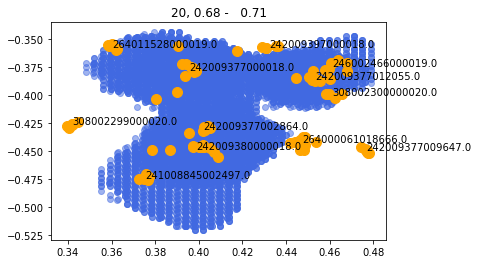

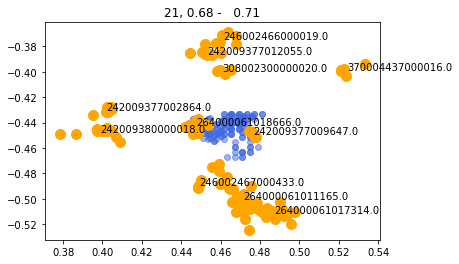

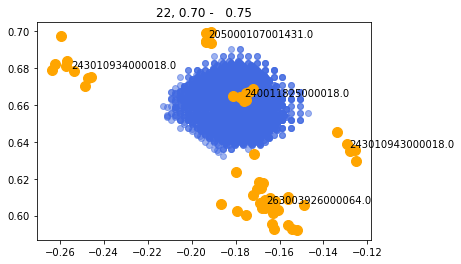

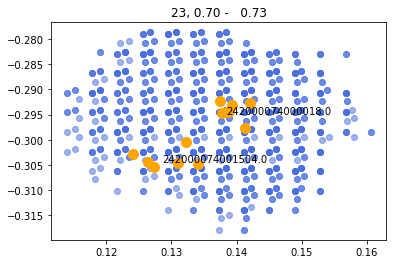

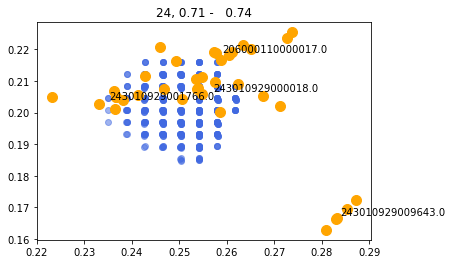

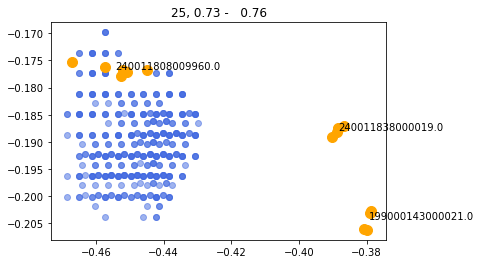

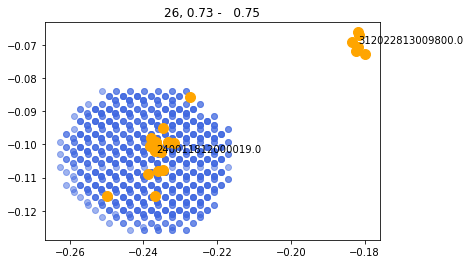

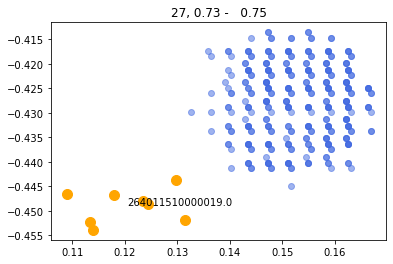

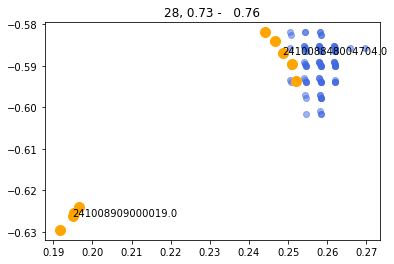

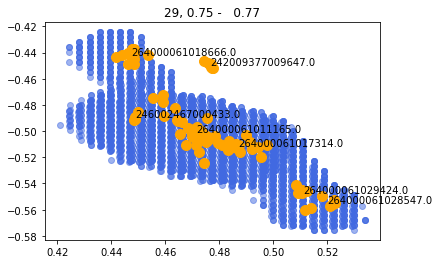

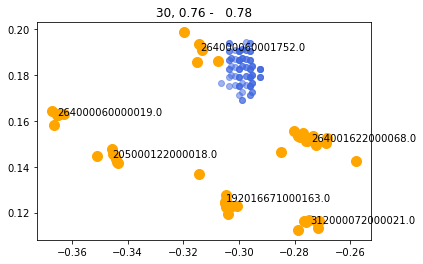

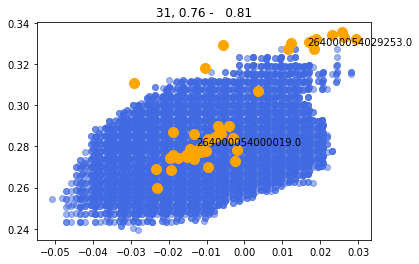

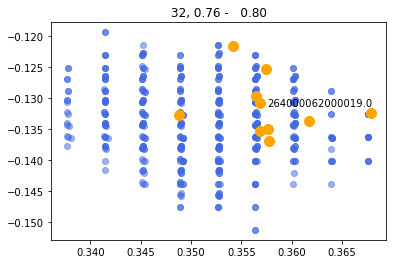

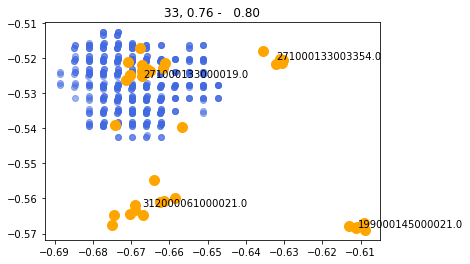

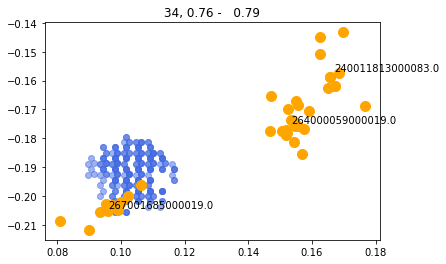

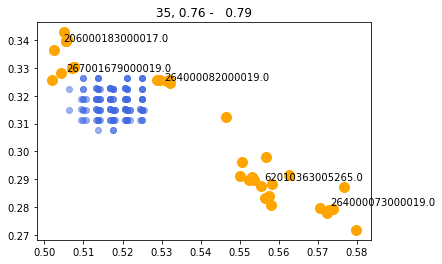

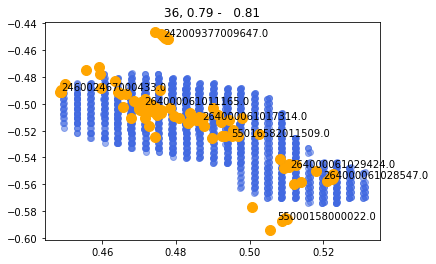

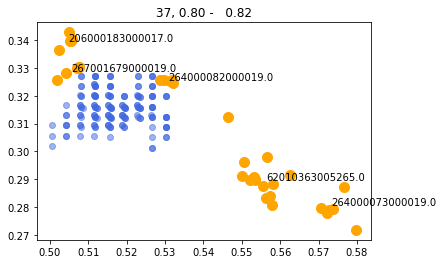

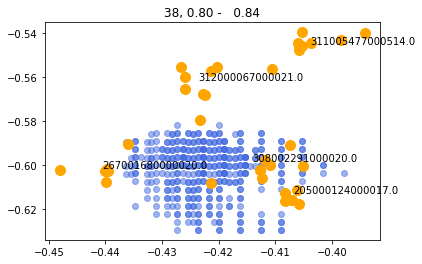

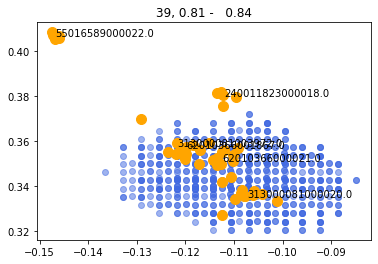

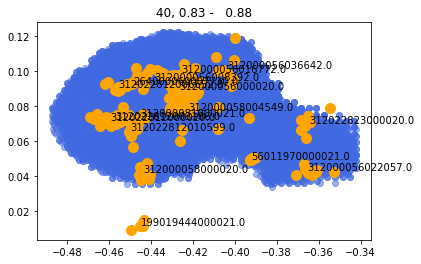

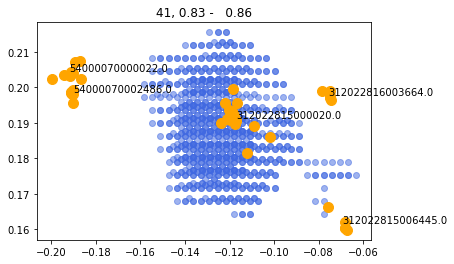

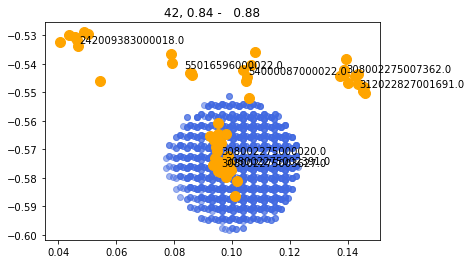

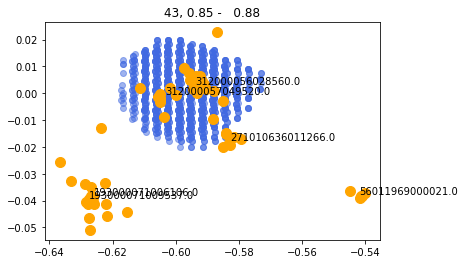

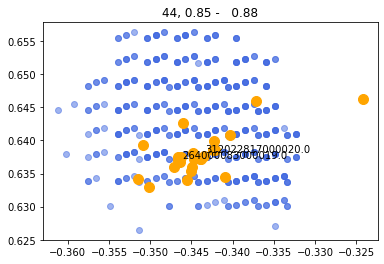

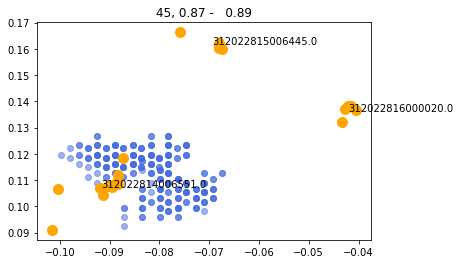

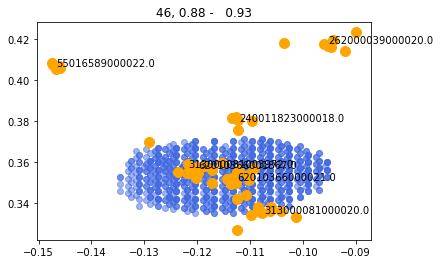

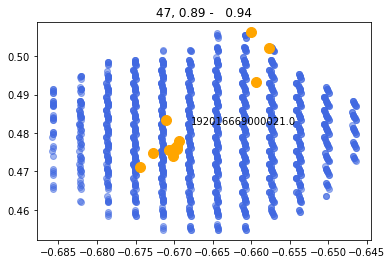

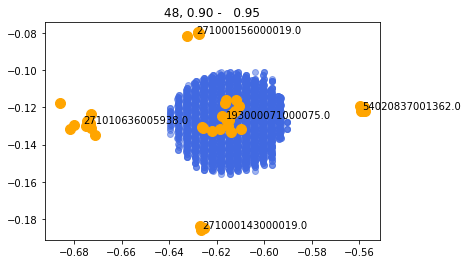

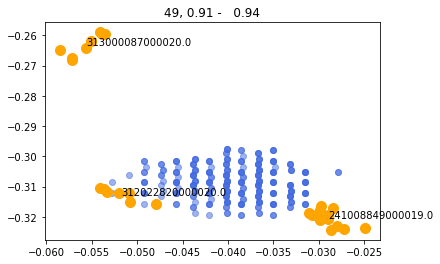

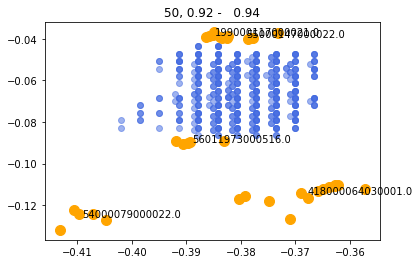

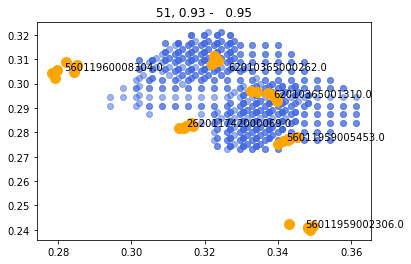

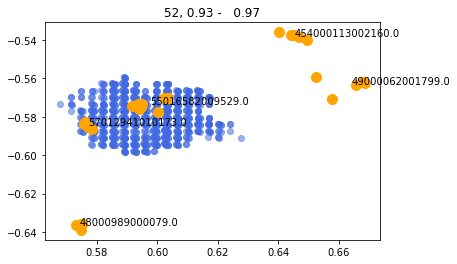

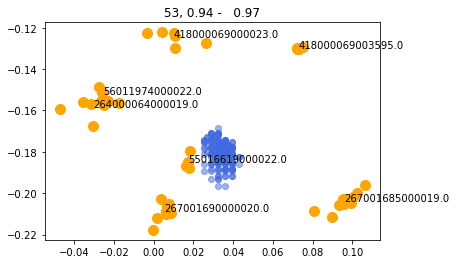

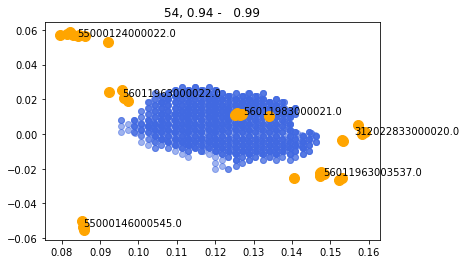

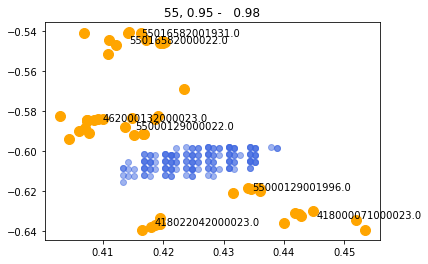

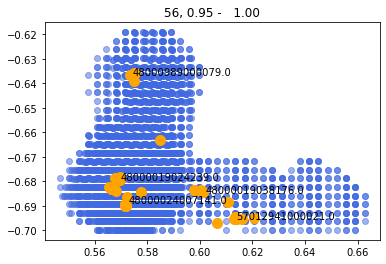

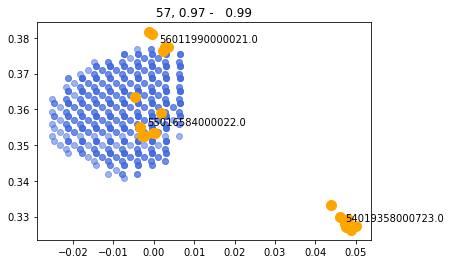

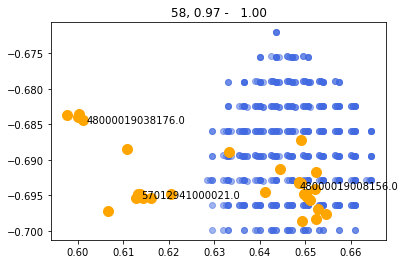

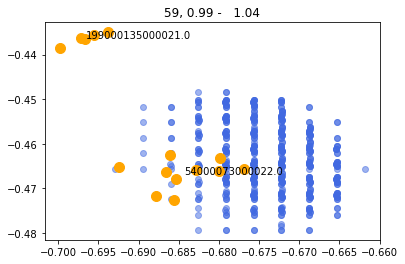

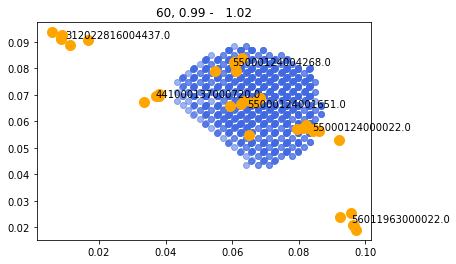

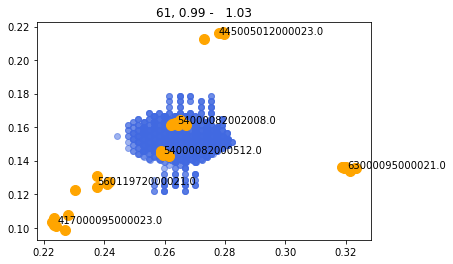

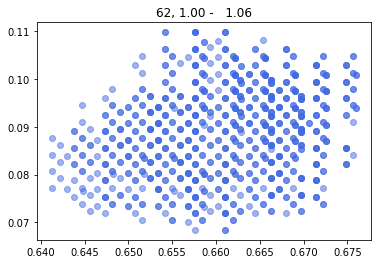

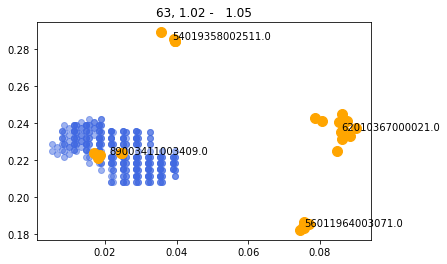

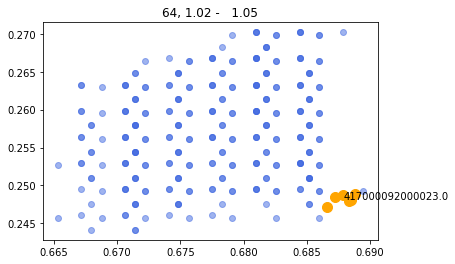

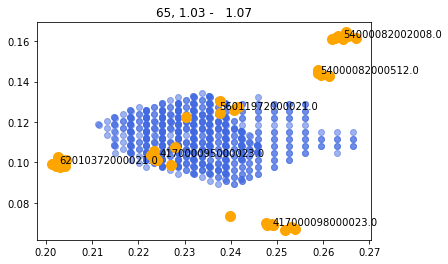

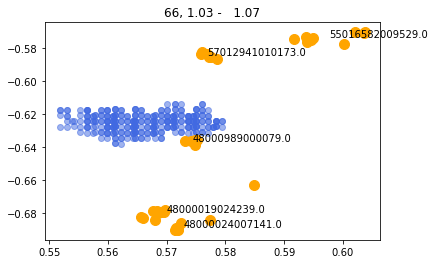

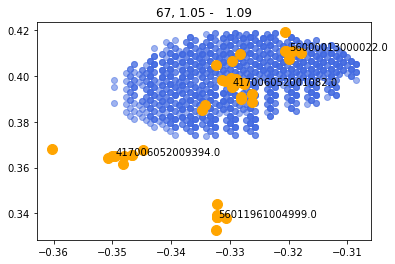

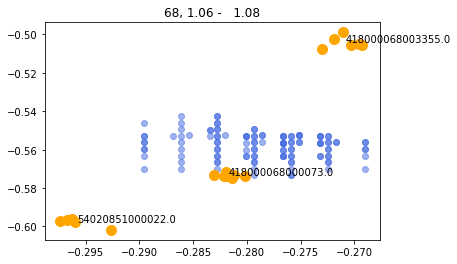

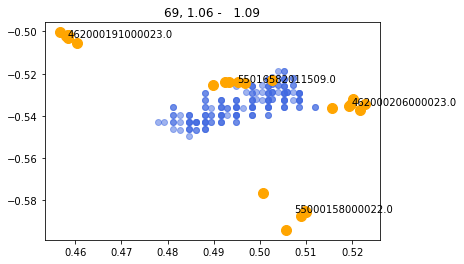

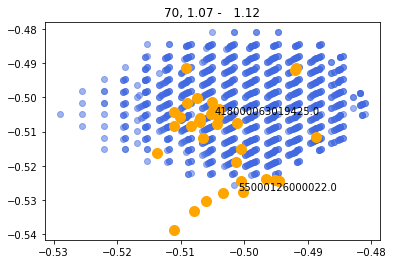

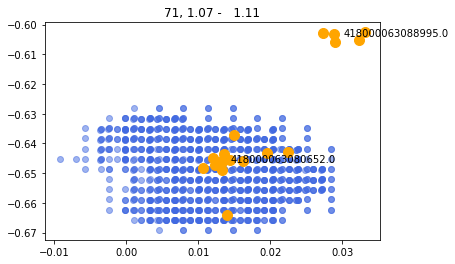

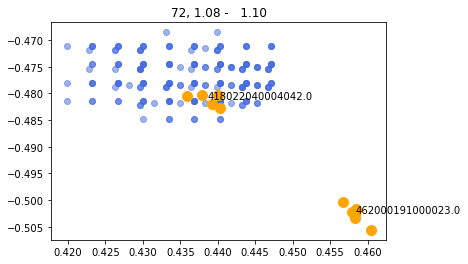

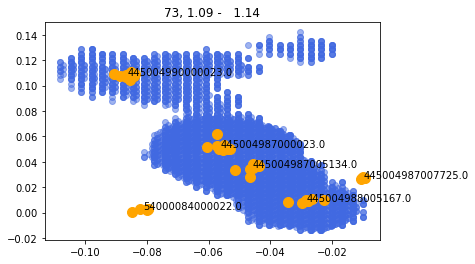

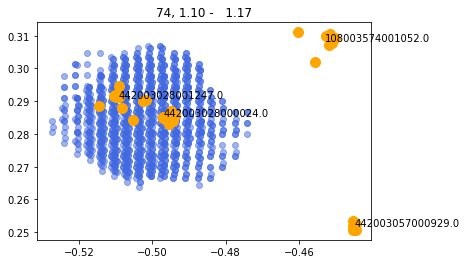

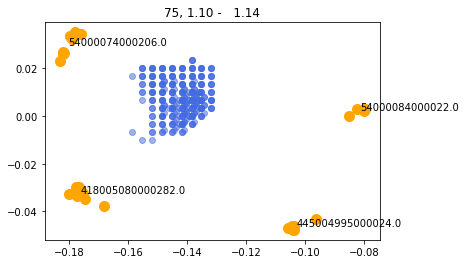

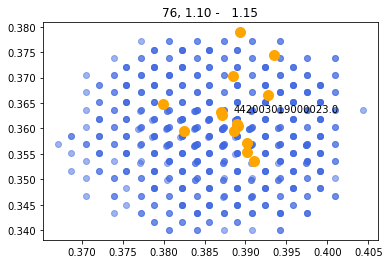

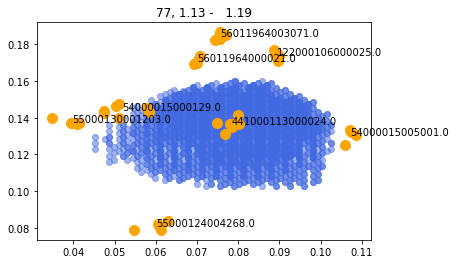

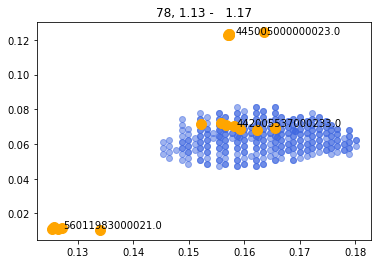

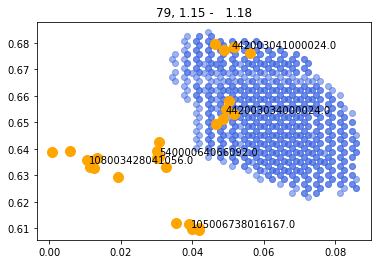

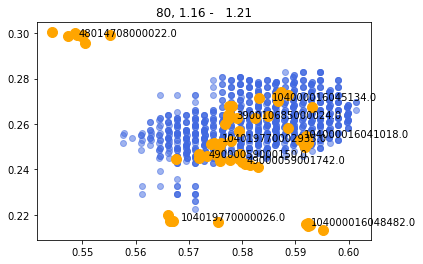

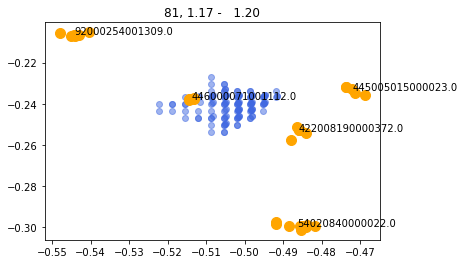

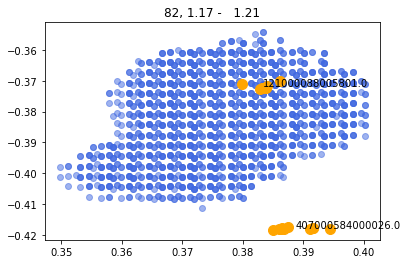

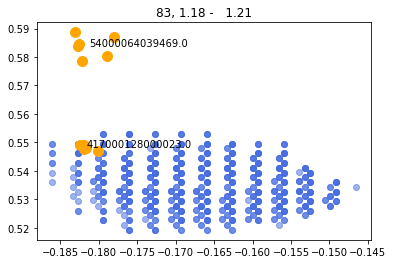

In [21]:
for i, v in enumerate(index1):
#     print(j)
    fig, ax = plt.subplots()
    
    num = 0
    ra = 0
    dec = 0
    z = 0
    for j in range(len(index1[i])):

        
        ra += len(od4_ra[index1[i][j]][index2[i][j]]) * od4_ra[index1[i][j]][index2[i][j]].mean()
        dec += len(od4_dec[index1[i][j]][index2[i][j]]) * od4_dec[index1[i][j]][index2[i][j]].mean()
        z += len(od4_dec[index1[i][j]][index2[i][j]]) * redshifts[zstart[i][0] + 80 + j]
        num += len(od4_ra[index1[i][j]][index2[i][j]])
        
        #overdense region
        ax.scatter(od4_ra[index1[i][j]][index2[i][j]], od4_dec[index1[i][j]][index2[i][j]], color = 'royalblue', alpha = .5)
            
    ax.set_title(f'{i},{redshifts[zstart[i][0] + 80]: .2f} -  {redshifts[zend[i][0] + 80]: .2f}')
#     plt.text(ra, dec, f'{j},{redshifts[zstart[j]][0] : .2f} -  {redshifts[zend[j]][0]: .2f}', fontsize = 20)        
    
    ra_cl = ra / num
    dec_cl = dec / num
    z_cl = z / num

    rad = search_radius(z_cl)
    dist_mask = (hs_ra - ra_cl)**2 + (hs_dec - dec_cl)**2 <= 4 * rad**2
    zmask = (hs_z >= z_cl - 0.1 * (z_cl+1)) & (hs_z <= z_cl + 0.1 * (z_cl+1))
    
    idxs = np.where(dist_mask & zmask)[0]
    
    if len(idxs) > 0:
        for k in idxs:
            cands = sample[sample['haloID'] == hs_id[k]]
            
            plt.scatter(cands['ra'], cands['dec'], s = 100, color = 'orange')
            plt.text(cands['ra'].mean(), cands['dec'].mean(), f'{hs_id[k]}')
     
    plt.savefig(f'figures/mock/fig{i}.png')

In [46]:
# import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2 import service_account
import datetime

from google.cloud import storage

In [47]:
def generate_upload_signed_url_v4(bucket_name, blob_name):
    """Generates a v4 signed URL for uploading a blob using HTTP PUT.

    Note that this method requires a service account key file. You can not use
    this if you are using Application Default Credentials from Google Compute
    Engine or from the Google Cloud SDK.
    """
    # bucket_name = 'your-bucket-name'
    # blob_name = 'your-object-name'

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(blob_name)

    url = blob.generate_signed_url(
        version="v4",
        # This URL is valid for 15 minutes
        expiration=datetime.timedelta(minutes=15),
        # Allow PUT requests using this URL.
        method="PUT",
        content_type="application/octet-stream",
    )

    print("Generated PUT signed URL:")
    print(url)
    print("You can use this URL with any user agent, for example:")
    print(
        "curl -X PUT -H 'Content-Type: application/octet-stream' "
        "--upload-file my-file '{}'".format(url)
    )
    return url


In [48]:

def generate_upload_signed_url_v4(bucket_name, blob_name):
    """Generates a v4 signed URL for uploading a blob using HTTP PUT.

    Note that this method requires a service account key file. You can not use
    this if you are using Application Default Credentials from Google Compute
    Engine or from the Google Cloud SDK.
    """
    # bucket_name = 'your-bucket-name'
    # blob_name = 'your-object-name'

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(blob_name)

    url = blob.generate_signed_url(
        version="v4",
        # This URL is valid for 15 minutes
        expiration=datetime.timedelta(minutes=15),
        # Allow PUT requests using this URL.
        method="PUT",
        content_type="application/octet-stream",
    )

    print("Generated PUT signed URL:")
    print(url)
    print("You can use this URL with any user agent, for example:")
    print(
        "curl -X PUT -H 'Content-Type: application/octet-stream' "
        "--upload-file my-file '{}'".format(url)
    )
    return url

In [50]:
generate_upload_signed_url_v4('bucket', 'blob')

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started

In [23]:
scope = ['https://www.googleapis.com/auth/presentations']
json_file_name = '/home/ehko/COSMOS_code/presentation-astronomy-7e2497dd8866.json'
creds = service_account.Credentials.from_service_account_file(json_file_name, scopes = scope)

In [31]:
service = build('slides', 'v1', credentials = creds)
p_id = '17prq1LW0v0r1U4iEcDddD499UQFsEW8amdQ8tSWsqoA'
presentation = service.presentations().get(presentationId = p_id).execute()

In [32]:
requests = [
    {
        'createSlide': {
#             'objectId': page_id,
            'insertionIndex': '1',
#             'slideLayoutReference': {
#                 'predefinedLayout': 'TITLE_AND_ONE_COLUMN'
#             }
        }
    }
]

In [38]:
# plt.imread()
i = 0
img_url = f'figures/mock/fig{i}.png'

requests.append({
    'createImage':{
        'objectId' : f'mock {i}',
        'url' : img_url
        
    }
    
})

In [39]:
body = {
    'requests': requests   
}

In [40]:
response = service.presentations().batchUpdate(presentationId = p_id, body=body).execute()

HttpError: <HttpError 400 when requesting https://slides.googleapis.com/v1/presentations/17prq1LW0v0r1U4iEcDddD499UQFsEW8amdQ8tSWsqoA:batchUpdate?alt=json returned "Invalid requests[1].createImage: The URL should start with http:// or https://.". Details: "Invalid requests[1].createImage: The URL should start with http:// or https://.">

In [ ]:
create_slide_response = response.get('replies')[0].get('createSlide')